In [1]:
# EfficientNet-B0 com 4 Configurações por 40 epochs

In [2]:
#!pip install efficientnet-pytorch

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2
from tqdm import tqdm
import time
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score, hamming_loss, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet

Caminho do Notebook: /home/matildxi/projects_faa/project2/odir-project/notebooks
Raiz do Projeto: /home/matildxi/projects_faa/project2/odir-project
Caminho do Dataset: /home/matildxi/projects_faa/project2/odir-project/data/odir5k
✅ Sucesso: Pasta de dados encontrada!
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images


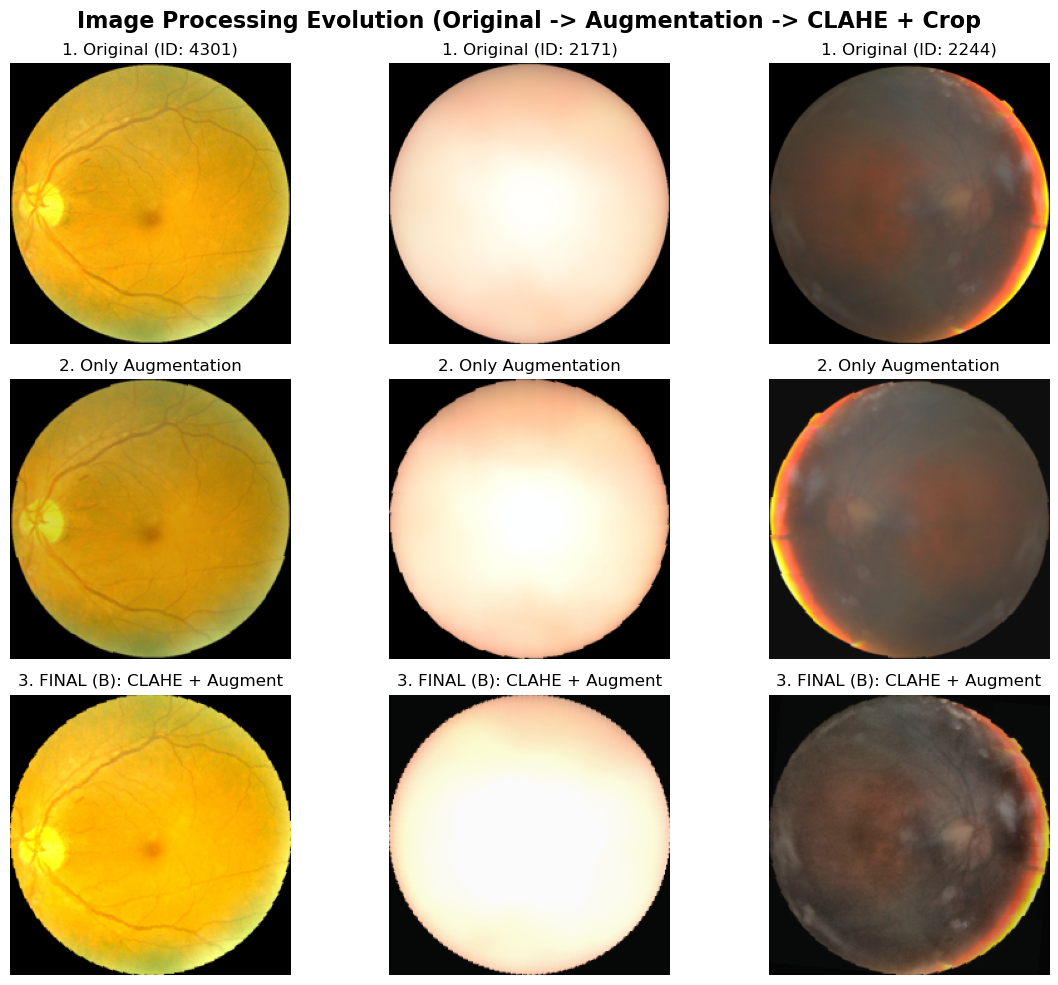

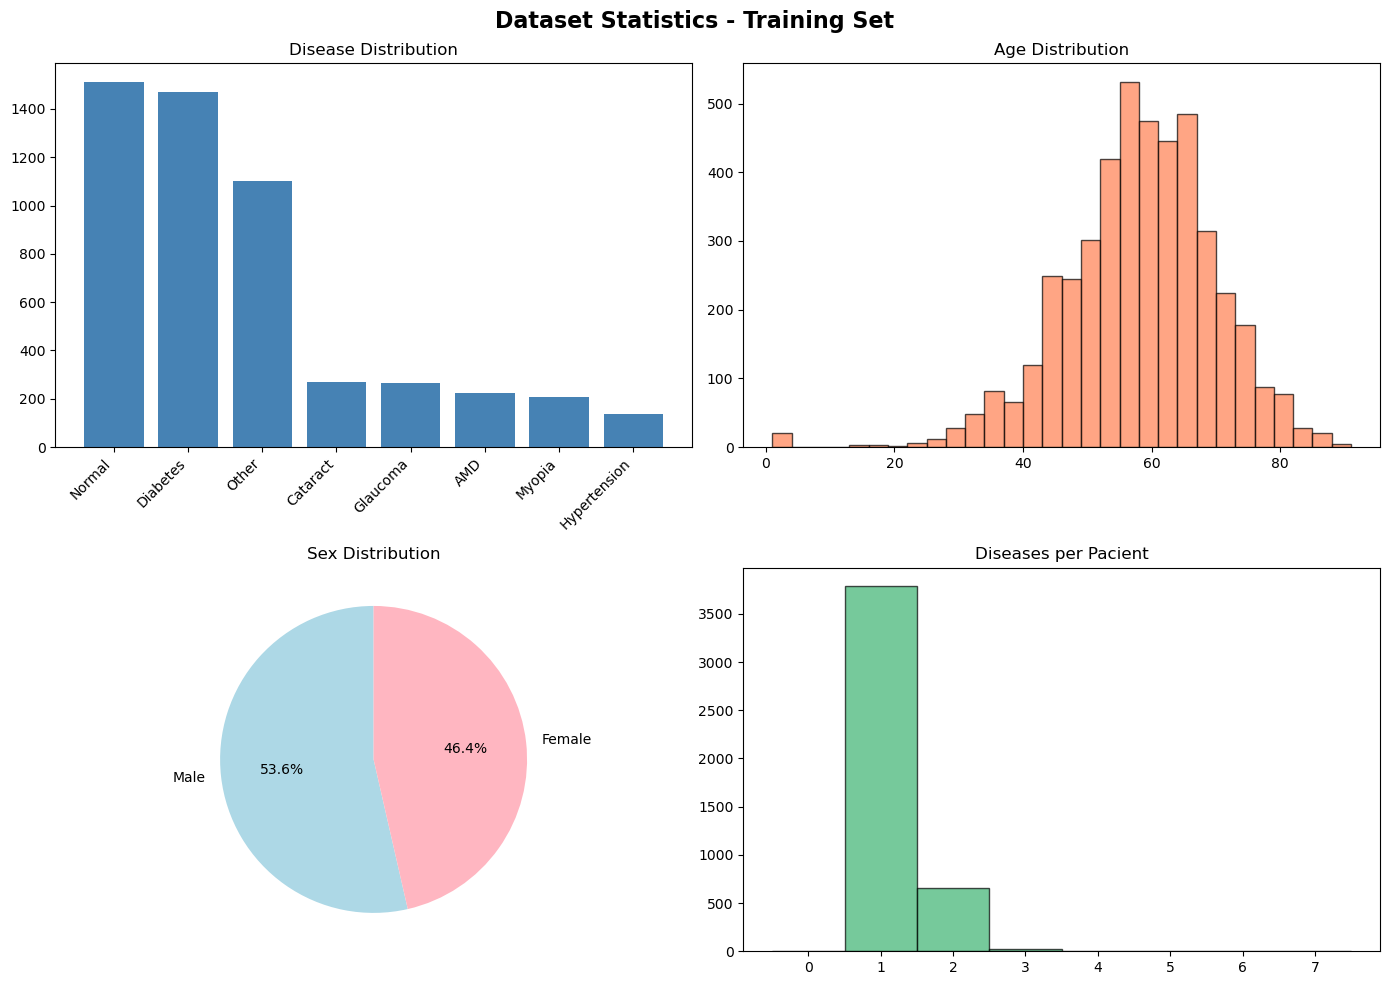

  Estatísticas guardadas em: results/dataset_statistics.png

 Resume: Train: 4474 | Val: 959 | Test: 959

COMPREHENSIVE EDA & PREPROCESSING ANALYSIS

DATASET SUMMARY - ODIR-5K
     Split  Patients  Images Percentage
  Training      2978    4474      70.0%
Validation       897     959      15.0%
      Test       891     959      15.0%
     Total      4766    6392       100%


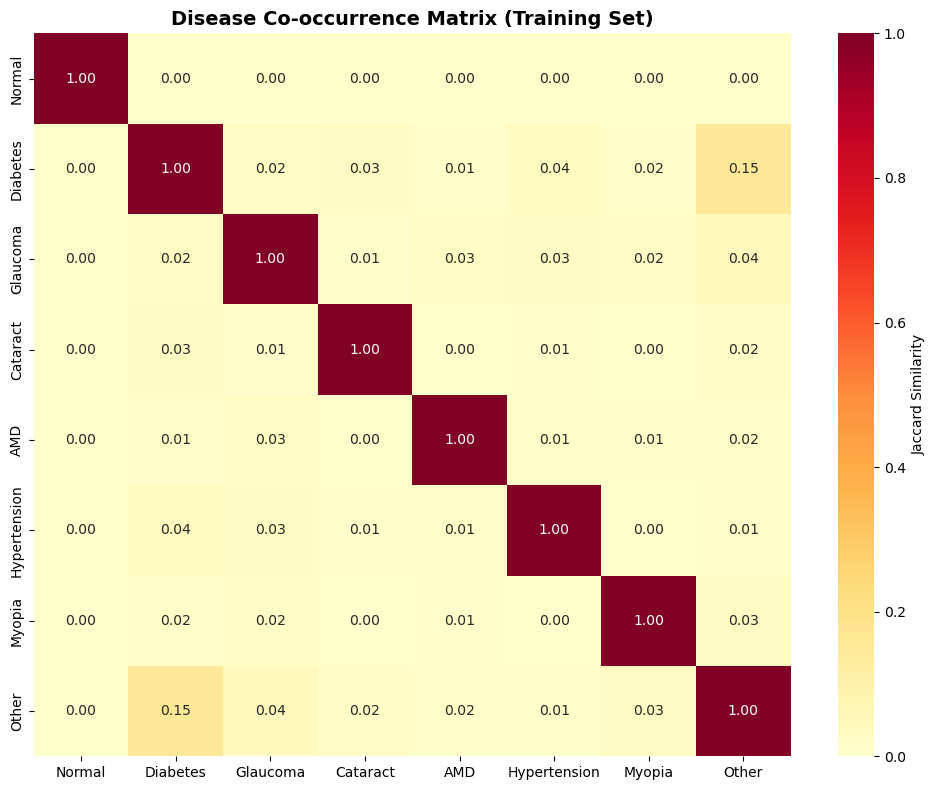


🔍 Most Common Disease Pairs:
  Diabetes + Other: 338 cases
  Diabetes + Hypertension: 59 cases
  Glaucoma + Other: 54 cases
  Diabetes + Cataract: 52 cases
  Diabetes + Glaucoma: 42 cases
  Myopia + Other: 36 cases
  Cataract + Other: 31 cases
  Diabetes + Myopia: 25 cases
  AMD + Other: 20 cases
  Diabetes + AMD: 19 cases

 Multi-label Statistics:
  Images with 0 diseases: 0 (0.0%)
  Images with 1 disease: 3791 (84.7%)
  Images with 2+ diseases: 683 (15.3%)
  Max diseases per image: 3
  Mean diseases per image: 1.16

📈 Per-Disease Statistics:
  Normal         : 1513 ( 33.8%)
  Diabetes       : 1470 ( 32.9%)
  Glaucoma       :  264 (  5.9%)
  Cataract       :  271 (  6.1%)
  AMD            :  223 (  5.0%)
  Hypertension   :  136 (  3.0%)
  Myopia         :  207 (  4.6%)
  Other          : 1100 ( 24.6%)
  📂 train: 4474 pacients, 5732 images

 Analyzing image quality (500 samples)...


100%|██████████| 500/500 [00:06<00:00, 82.66it/s]


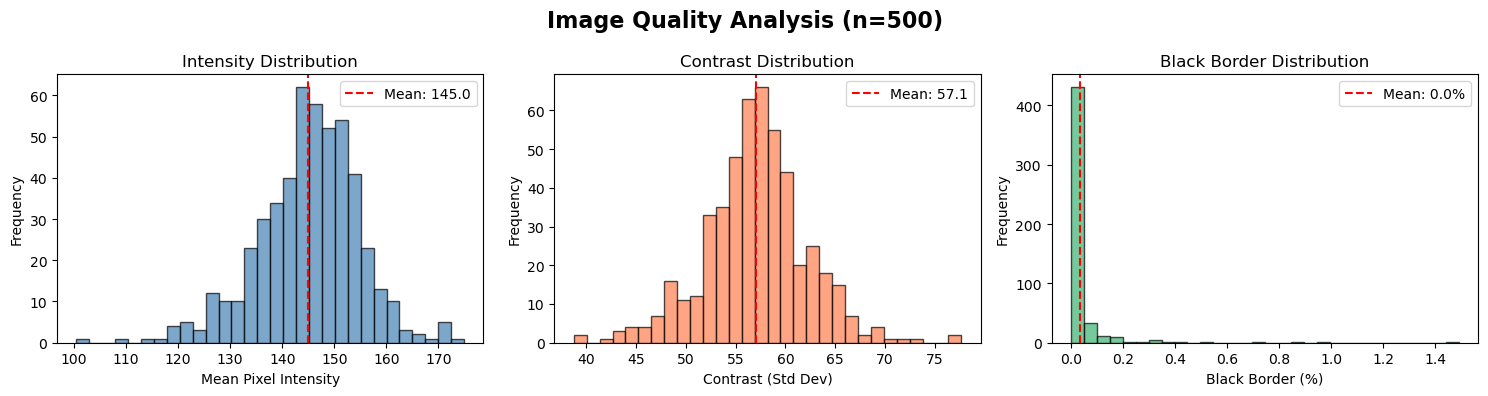


 Quality Metrics:
  Mean intensity: 145.0 ± 9.8
  Mean contrast: 57.1 ± 5.2
  Mean black border: 0.0% ± 0.1%
  Images with >10% black border: 0 (0.0%)

 Measuring Cropping Effect...


100%|██████████| 100/100 [00:00<00:00, 169.65it/s]


  Successfully analyzed: 100/100 images
  Mean pixels removed: 1.7% ± 1.5%
  Median: 1.8%
  Range: 0.0% - 11.7%
  Images with >20% removed: 0/100

 Measuring CLAHE Effect...
Loading datasets...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
Analyzing 50 images...


100%|██████████| 50/50 [00:02<00:00, 23.03it/s]


Successfully analyzed: 50/50 images


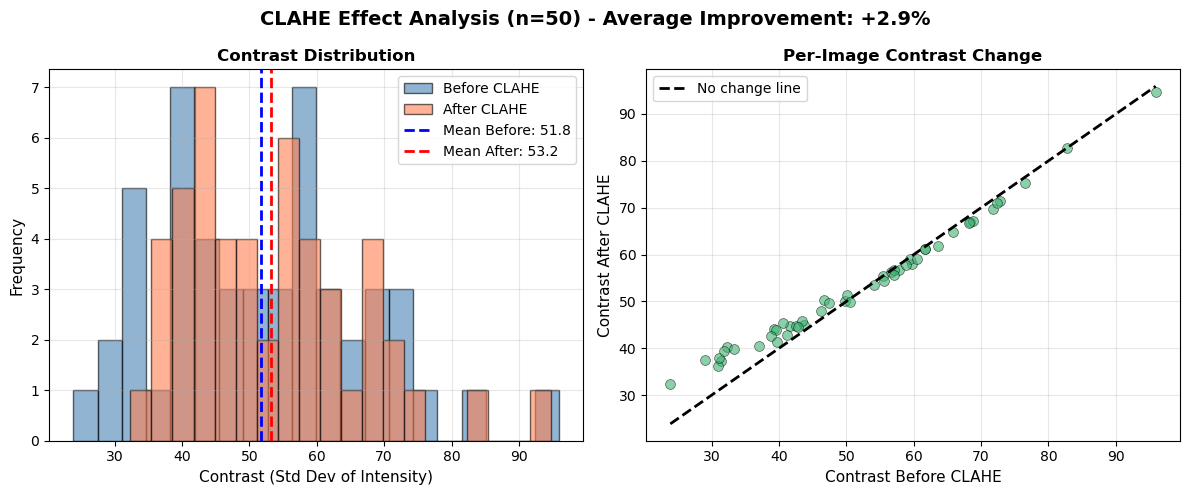


📊 Results:
  Mean contrast before: 51.76 ± 15.36
  Mean contrast after:  53.25 ± 12.82
  Average improvement:  +2.9%
  Min improvement:      +-37.5%
  Max improvement:      +83.1%

 Metrics saved to results/clahe_metrics.json
 Figure saved to results/clahe_effect.png
  📂 train: 4474 pacients, 5732 images

 Generating pipeline visualization (3 samples)...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
 Pipeline visualization saved to results/pipeline_simple.png


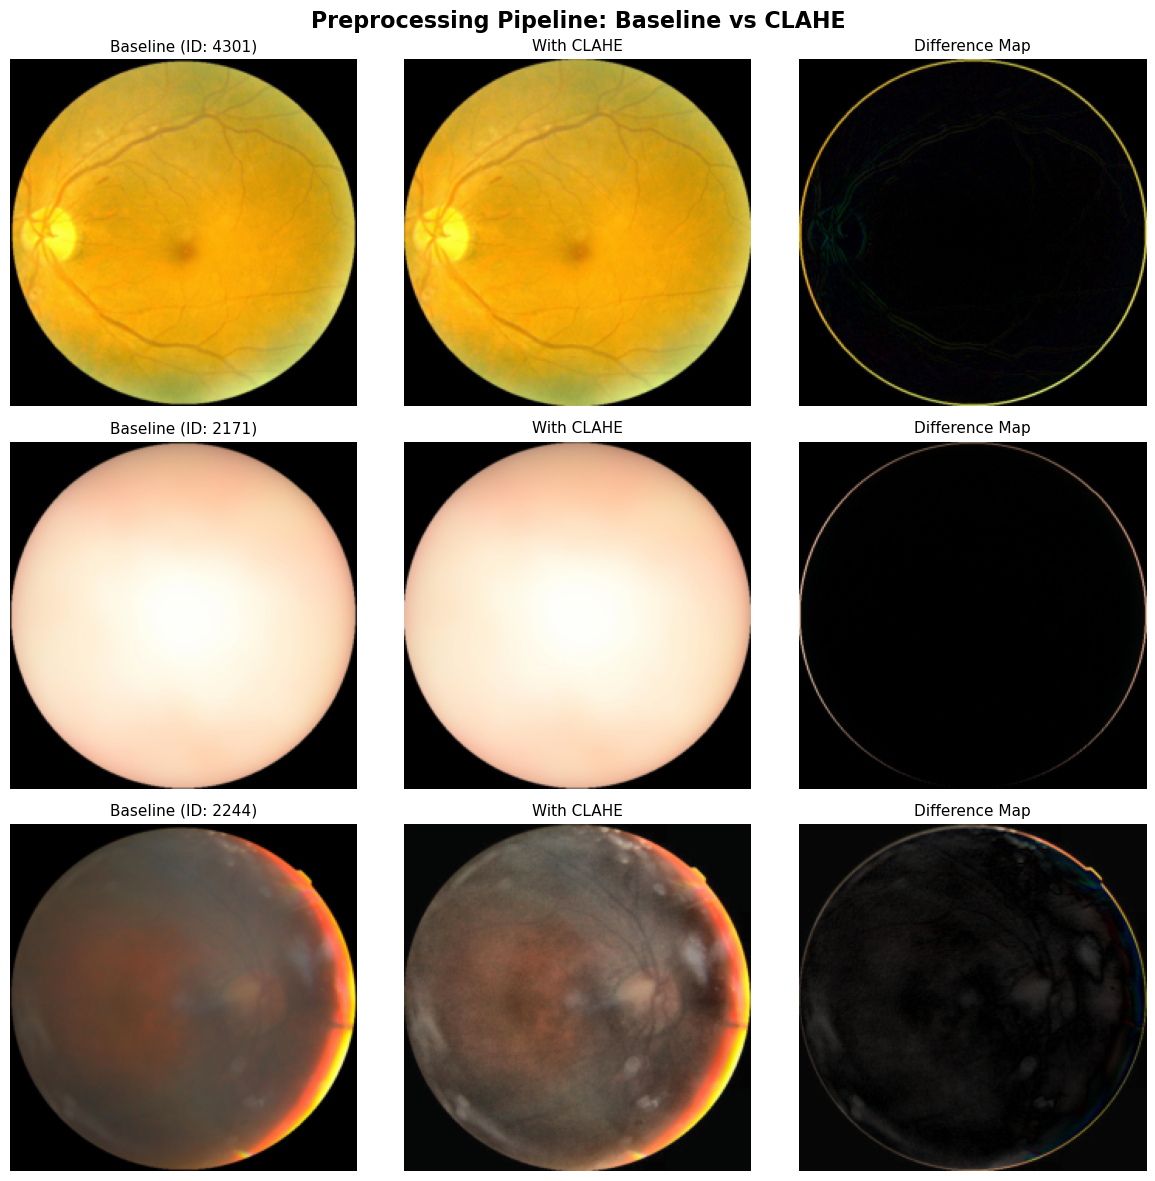


 All EDA and Preprocessing analyses completed!
   Check 'results/' folder for saved figures.
✅ ODIRDataset: OK
✅ ApplyCLAHEandCrop_Adaptive: OK
✅ CropOnly: OK

VERIFICAÇÃO - Tudo pronto para usar noutros notebooks
✅ ODIRDataset
✅ ApplyCLAHEandCrop_Adaptive
✅ CropOnly
✅ get_v1_baseline_transform
✅ get_v2_crop_only_transform
✅ get_v3_crop_aug_transform
✅ get_v4_full_pipeline_transform
✅ get_val_test_transform
✅ get_val_test_transform_CLAHE
✅ create_datasets_for_config

🎉 TUDO PRONTO! Podes usar %run neste notebook.

 Preprocessing carregado!


In [15]:
%run 01_Data_Preparation.ipynb

print("\n Preprocessing carregado!")

In [4]:
datasets_v1 = create_datasets_for_config('v1')
datasets_v2 = create_datasets_for_config('v2')
datasets_v3 = create_datasets_for_config('v3')
datasets_v4 = create_datasets_for_config('v4')


📦 Criando datasets para config: V1
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v1 criados!

📦 Criando datasets para config: V2
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v2 criados!

📦 Criando datasets para config: V3
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v3 criados!

📦 Criando datasets para config: V4
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v4 criados!


In [5]:
train_v1 = datasets_v1['train']
val_v1 = datasets_v1['val']
test_v1 = datasets_v1['test']

train_v2 = datasets_v2['train']
val_v2 = datasets_v2['val']
test_v2 = datasets_v2['test']

train_v3 = datasets_v3['train']
val_v3 = datasets_v3['val']
test_v3 = datasets_v3['test']

train_v4 = datasets_v4['train']
val_v4 = datasets_v4['val']
test_v4 = datasets_v4['test']

In [6]:
!pip install timm
import timm
class EfficientNetB0MultiLabel(nn.Module):
    def __init__(self, num_classes=8, dropout=0.2):
        super().__init__()
        
        # timm é mais moderno e melhor
        self.model = timm.create_model(
            'efficientnet_b0',
            pretrained=True,
            drop_rate=dropout, 
            num_classes=num_classes
        )
    
    def forward(self, x):
        return self.model(x)

In [7]:
def calculate_class_weights_clipped(dataset, max_weight=3.0):
    """
    Calcular SQRT weights + CLIP em valor máximo
    """
    import numpy as np
    from tqdm import tqdm
    
    print(f"\n📊 Calculating CLIPPED class weights (max={max_weight})...")
    
    labels = []
    for _, label, _ in tqdm(dataset, desc='Scanning'):
        labels.append(label.numpy())
    
    labels = np.array(labels)
    pos_counts = labels.sum(axis=0)
    neg_counts = len(labels) - pos_counts
    
    # SQRT
    weights_raw = neg_counts / (pos_counts + 1e-6)
    weights_sqrt = np.sqrt(weights_raw)
    
    # CLIP!
    weights_clipped = np.clip(weights_sqrt, 1.0, max_weight)
    
    # Mostrar
    class_names = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    print(f"\n{'Class':<8} {'Pos':<8} {'Sqrt':<8} {'Clipped':<10} {'Change':<12}")
    print("-" * 55)
    for name, w_sqrt, w_clip, pos in zip(class_names, weights_sqrt, weights_clipped, pos_counts):
        change = "" if abs(w_sqrt - w_clip) < 0.01 else f"✂️ {w_sqrt:.2f}→{w_clip:.2f}"
        print(f"{name:<8} {int(pos):<8} {w_sqrt:.2f}   {w_clip:.2f}      {change}")
    print("-" * 55)
    
    clipped_count = sum(weights_sqrt > max_weight)
    print(f"✅ Weights clipped: {clipped_count} classes")
    print(f"   Max weight: {max_weight}")
    print(f"   Range: {weights_clipped.min():.2f} - {weights_clipped.max():.2f}\n")
    
    return torch.tensor(weights_clipped, dtype=torch.float)

In [8]:
def optimize_thresholds(model, val_loader, device):
    """
    Otimizar threshold por classe no validation set
    EXECUTAR DEPOIS do treino!
    """
    import numpy as np
    from tqdm import tqdm
    from sklearn.metrics import f1_score
    
    print("\n" + "="*70)
    print("🔍 OPTIMIZING THRESHOLDS")
    print("="*70)
    
    model.eval()
    
    # Coletar todas as predições
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels, _ in tqdm(val_loader, desc='Collecting predictions'):
            images = images.to(device)
            outputs = torch.sigmoid(model(images))
            all_probs.append(outputs.cpu())
            all_labels.append(labels)
    
    all_probs = torch.cat(all_probs).numpy()
    all_labels = torch.cat(all_labels).numpy()
    
    # Otimizar threshold para cada classe
    optimal_thresholds = []
    class_names = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    
    print(f"\n{'Class':<8} {'Default F1':<12} {'Best F1':<12} {'Threshold':<12} {'Gain':<10}")
    print("-" * 60)
    
    total_gain = 0
    
    for i in range(8):
        # F1 com threshold default 0.5
        default_preds = (all_probs[:, i] > 0.5).astype(int)
        default_f1 = f1_score(all_labels[:, i], default_preds, zero_division=0)
        
        # Buscar melhor threshold
        best_f1 = 0
        best_thresh = 0.5
        
        for thresh in np.arange(0.05, 0.95, 0.02):
            preds = (all_probs[:, i] > thresh).astype(int)
            f1 = f1_score(all_labels[:, i], preds, zero_division=0)
            
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh
        
        optimal_thresholds.append(best_thresh)
        gain = best_f1 - default_f1
        total_gain += gain
        
        print(f"{class_names[i]:<8} {default_f1:.4f}       {best_f1:.4f}       "
              f"{best_thresh:.2f}          {gain:+.4f}")
    
    print("-" * 60)
    print(f"Average gain: {total_gain/8:+.4f}\n")
    
    return np.array(optimal_thresholds)

In [9]:
def evaluate_with_thresholds(model, test_loader, thresholds, device):
    """
    Avaliar test set com thresholds otimizados
    """
    from sklearn.metrics import f1_score, hamming_loss
    
    model.eval()
    
    test_preds = []
    test_labels = []
    
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc='Testing with optimized thresholds'):
            images = images.to(device)
            outputs = torch.sigmoid(model(images)).cpu().numpy()
            
            # Aplicar threshold específico por classe
            preds = np.zeros_like(outputs)
            for i in range(8):
                preds[:, i] = (outputs[:, i] > thresholds[i]).astype(int)
            
            test_preds.append(preds)
            test_labels.append(labels.numpy())
    
    test_preds = np.concatenate(test_preds)
    test_labels = np.concatenate(test_labels)
    
    # Métricas
    test_f1 = f1_score(test_labels, test_preds, average='macro', zero_division=0)
    test_acc = 1.0 - hamming_loss(test_labels, test_preds)
    per_class_f1 = f1_score(test_labels, test_preds, average=None, zero_division=0)
    
    return test_f1, test_acc, per_class_f1

In [12]:
def train_model_complete(train_dataset, val_dataset, test_dataset, 
                        config_name, num_epochs=10, batch_size=32, lr=1e-4, use_class_weights=False, use_focal_loss=False):
    """
    Treinar EfficientNet com visualizações automáticas para o relatório
    """
    
    print(f"\n{'='*70}")
    print(f"TRAINING EFFICIENTNET-B0 - {config_name.upper()}")
    print(f"{'='*70}\n")
    
    # Setup
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    pin = (device.type == "cuda")   # em CPU -> False
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size,
                              shuffle=True, num_workers=2, pin_memory=pin)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size,
                              shuffle=False, num_workers=2, pin_memory=pin)
    test_loader  = DataLoader(test_dataset, batch_size=batch_size,
                              shuffle=False, num_workers=2, pin_memory=pin)

    # Model
    model = EfficientNetB0MultiLabel(num_classes=8, dropout=0.2)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"📊 Model: {num_params:,} parameters")

    # ==================== LOSS COM CLASS WEIGHTS ====================
    if use_class_weights:
        print("\n🔧 Using CLIPPED CLASS WEIGHTS to balance classes...")
        class_weights = calculate_class_weights_clipped(  # ← USAR FUNÇÃO NOVA!
            train_dataset, 
            max_weight=3.0  # ← H será 2.38 (não 5.65!)
        ).to(device)
        criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)
        print("✅ Clipped class weights activated!")
    else:
        criterion = nn.BCEWithLogitsLoss()
        print("⚠️  Using standard BCE (no class weights)")
    
    # Optimizer
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr,           
        weight_decay=1e-4  
    )    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=5
    )
    
    # Tracking
    history = {
        'train_loss': [], 'train_f1': [], 'train_acc': [],
        'val_loss': [], 'val_f1': [], 'val_acc': [],
        'learning_rates': [], 'epoch_times': []
    }
    
    best_val_f1 = 0.0
    start_time = time.time()
    
    # ==================== TRAINING LOOP ====================
    for epoch in range(num_epochs):
        epoch_start = time.time()
        
        # TRAIN
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []
        
        for images, labels, _ in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]'):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad(set_to_none=True)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_preds.append(torch.sigmoid(outputs).detach().cpu())
            train_labels.append(labels.cpu())
        
        train_loss /= len(train_loader)
        train_preds = torch.cat(train_preds).numpy()
        train_labels = torch.cat(train_labels).numpy()
        train_preds_binary = (train_preds > 0.5).astype(int)
        
        train_f1 = f1_score(train_labels, train_preds_binary, average='macro', zero_division=0)
        train_acc = 1.0 - hamming_loss(train_labels, train_preds_binary)
        
        # VALIDATION
        model.eval()
        val_loss = 0.0
        val_preds, val_labels = [], []
        
        with torch.no_grad():
            for images, labels, _ in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]'):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                val_preds.append(torch.sigmoid(outputs).cpu())
                val_labels.append(labels.cpu())
        
        val_loss /= len(val_loader)
        val_preds = torch.cat(val_preds).numpy()
        val_labels = torch.cat(val_labels).numpy()
        val_preds_binary = (val_preds > 0.5).astype(int)
        
        val_f1 = f1_score(val_labels, val_preds_binary, average='macro', zero_division=0)
        val_acc   = 1.0 - hamming_loss(val_labels, val_preds_binary)
        
        # Scheduler
        scheduler.step(val_f1)
        current_lr = optimizer.param_groups[0]['lr']
        
        # Save history
        epoch_time = time.time() - epoch_start
        history['train_loss'].append(train_loss)
        history['train_f1'].append(train_f1)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_f1'].append(val_f1)
        history['val_acc'].append(val_acc)
        history['learning_rates'].append(current_lr)
        history['epoch_times'].append(epoch_time)
        
        # Print progress
        print(f"\nEpoch {epoch+1}/{num_epochs}:")
        print(f"  Train - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
        print(f"  Val   - Loss: {val_loss:.4f}, F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
        print(f"  LR: {current_lr:.2e}, Time: {epoch_time:.1f}s")
        
        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_f1': val_f1,
                'history': history
            }, f'efficientnet_{config_name}_best.pth')
            print(f"  ✅ Best model saved! (F1: {val_f1:.4f})")
    
    total_train_time = time.time() - start_time
    
    # ==================== TEST EVALUATION ====================
    print(f"\n{'='*70}")
    print("EVALUATING ON TEST SET")
    print(f"{'='*70}\n")
    
    checkpoint = torch.load(f'efficientnet_{config_name}_best.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    test_preds, test_labels = [], []
    inference_times = []
    
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)
            
            start = time.time()
            outputs = model(images)
            inference_times.append((time.time() - start) / len(images))
            
            test_preds.append(torch.sigmoid(outputs).cpu())
            test_labels.append(labels.cpu())
    
    test_preds = torch.cat(test_preds).numpy()
    test_labels = torch.cat(test_labels).numpy()
    test_preds_binary = (test_preds > 0.5).astype(int)
    
    # Metrics
    test_f1 = f1_score(test_labels, test_preds_binary, average='macro', zero_division=0)
    test_acc  = 1.0 - hamming_loss(test_labels, test_preds_binary)
    kappas = [
        cohen_kappa_score(test_labels[:, i], test_preds_binary[:, i])
        for i in range(test_labels.shape[1])
    ]
    test_kappa = float(np.mean(kappas))
    
    # Per-class metrics
    class_names = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    per_class_f1 = f1_score(test_labels, test_preds_binary, average=None, zero_division=0)
    
    print(f"\n📊 FINAL TEST RESULTS - {config_name.upper()}:")
    print(f"  Accuracy:  {test_acc:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")
    print(f"  Kappa:     {test_kappa:.4f}")
    print(f"  Avg Epoch Time: {np.mean(history['epoch_times']):.1f}s")
    print(f"  Avg Inference:  {np.mean(inference_times)*1000:.2f}ms/image")
    print(f"\n  Per-class F1:")
    for i, name in enumerate(class_names):
        print(f"    {name}: {per_class_f1[i]:.4f}")
    
    # ==================== SAVE RESULTS ====================
    results = {
        'config': config_name,
        'num_params': num_params,
        'num_epochs': num_epochs,
        'best_val_f1': float(best_val_f1),
        'test_accuracy': float(test_acc),
        'test_f1': float(test_f1),
        'test_kappa': float(test_kappa),
        'per_class_f1': {name: float(f1) for name, f1 in zip(class_names, per_class_f1)},
        'total_train_time': float(total_train_time),
        'avg_epoch_time': float(np.mean(history['epoch_times'])),
        'avg_inference_time_ms': float(np.mean(inference_times) * 1000)
    }
    
    with open(f'efficientnet_{config_name}_results.json', 'w') as f:
        json.dump(results, f, indent=2)
    
    # Save history
    np.save(f'efficientnet_{config_name}_history.npy', history)
    
    # ==================== GENERATE VISUALIZATIONS ====================
    print(f"\n📊 Generating visualizations for report...")
    
    # 1. TRAINING CURVES
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'EfficientNet-B0 {config_name.upper()} - Training Progress', 
                 fontsize=16, fontweight='bold')
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Loss
    axes[0, 0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training & Validation Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # F1-Score
    axes[0, 1].plot(epochs, history['train_f1'], 'b-', label='Train F1', linewidth=2)
    axes[0, 1].plot(epochs, history['val_f1'], 'r-', label='Val F1', linewidth=2)
    axes[0, 1].axhline(y=best_val_f1, color='g', linestyle='--', 
                       label=f'Best Val F1: {best_val_f1:.4f}')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].set_title('F1-Score Progress')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Accuracy
    axes[1, 0].plot(epochs, history['train_acc'], 'b-', label='Train Acc', linewidth=2)
    axes[1, 0].plot(epochs, history['val_acc'], 'r-', label='Val Acc', linewidth=2)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].set_title('Accuracy Progress')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Learning Rate
    axes[1, 1].plot(epochs, history['learning_rates'], 'purple', linewidth=2)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Learning Rate')
    axes[1, 1].set_title('Learning Rate Schedule')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'efficientnet_{config_name}_training_curves.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. CONFUSION MATRIX (multi-label)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'{config_name.upper()} - Per-Class Confusion Matrices', 
                 fontsize=16, fontweight='bold')
    
    for i, class_name in enumerate(class_names):
        ax = axes[i // 4, i % 4]
        cm = confusion_matrix(test_labels[:, i], test_preds_binary[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                   xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
        ax.set_title(f'{class_name} (F1: {per_class_f1[i]:.3f})')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    
    plt.tight_layout()
    plt.savefig(f'efficientnet_{config_name}_confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. PER-CLASS F1 BAR CHART
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(class_names, per_class_f1, color='steelblue', edgecolor='black')
    ax.axhline(y=test_f1, color='red', linestyle='--', linewidth=2, 
               label=f'Average F1: {test_f1:.4f}')
    ax.set_xlabel('Disease Class', fontsize=12)
    ax.set_ylabel('F1-Score', fontsize=12)
    ax.set_title(f'{config_name.upper()} - Per-Class Performance', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1.0])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, f1 in zip(bars, per_class_f1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{f1:.3f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'efficientnet_{config_name}_per_class_f1.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"✅ Visualizations saved:")
    print(f"   - efficientnet_{config_name}_training_curves.png")
    print(f"   - efficientnet_{config_name}_confusion_matrices.png")
    print(f"   - efficientnet_{config_name}_per_class_f1.png")
    print(f"   - efficientnet_{config_name}_results.json")
    print(f"   - efficientnet_{config_name}_history.npy")
    
    return results, model, history

print("✅ Training function with visualizations ready!")

✅ Training function with visualizations ready!


In [ ]:
# V1: Baseline
print("\n" + "="*70)
print("🔵 CONFIGURATION V1: BASELINE")
print("="*70)
results_v1, model_v1, history_v1 = train_model_complete(
    train_v1, val_v1, test_v1, 'v1', num_epochs=40, batch_size=32, lr=5e-4
)

# V2: Baseline + Cropping
print("\n" + "="*70)
print("🟢 CONFIGURATION V2: BASELINE + CROPPING")
print("="*70)
results_v2, model_v2, history_v2 = train_model_complete(
    train_v2, val_v2, test_v2, 'v2', num_epochs=40, batch_size=32, lr=5e-4
)

# V3: Cropping + Augmentation
print("\n" + "="*70)
print("🟡 CONFIGURATION V3: CROPPING + AUGMENTATION")
print("="*70)
results_v3, model_v3, history_v3 = train_model_complete(
    train_v3, val_v3, test_v3, 'v3', num_epochs=40, batch_size=32, lr=5e-4
)

# V4: Full Pipeline (CLAHE)
print("\n" + "="*70)
print("🔴 CONFIGURATION V4: FULL PIPELINE")
print("="*70)
results_v4, model_v4, history_v4 = train_model_complete(
    train_v4, val_v4, test_v4, 'v4', num_epochs=40, batch_size=32, lr=5e-4
)

print("\n" + "="*70)
print("✅ ALL CONFIGURATIONS TRAINED SUCCESSFULLY!")
print("="*70)


🔵 CONFIGURATION V1: BASELINE

TRAINING EFFICIENTNET-B0 - V1

📊 Model: 4,017,796 parameters
⚠️  Using standard BCE (no class weights)


Epoch 1/40 [Train]:  14%|█▍        | 20/140 [00:34<03:10,  1.59s/it]

In [9]:
# ==================== COMPARAÇÃO ENTRE CONFIGURAÇÕES ====================

def create_ablation_comparison(configs=['v1', 'v2', 'v3', 'v4']):
    """Criar tabela e gráficos comparativos para o relatório"""
    
    print("\n📊 Creating ablation study comparison...")
    
    # Load all results
    all_results = []
    for config in configs:
        try:
            with open(f'efficientnet_{config}_results.json', 'r') as f:
                results = json.load(f)
                all_results.append(results)
        except FileNotFoundError:
            print(f"⚠️ Results for {config} not found, skipping...")
    
    if len(all_results) == 0:
        print("❌ No results found!")
        return
    
    # Create DataFrame
    df = pd.DataFrame(all_results)
    df = df[['config', 'num_params', 'test_accuracy', 'test_f1', 'test_kappa', 
             'avg_epoch_time', 'avg_inference_time_ms']]
    
    # Rename columns for better display
    df.columns = ['Config', 'Params', 'Accuracy', 'F1-Score', 'Kappa', 
                  'Epoch Time (s)', 'Inference (ms)']
    
    # Print table
    print("\n" + "="*80)
    print("EFFICIENTNET-B0 ABLATION STUDY - SUMMARY TABLE")
    print("="*80)
    print(df.to_string(index=False))
    print("="*80)
    
    # Save as CSV
    df.to_csv('efficientnet_ablation_comparison.csv', index=False)
    
    # Save as LaTeX
    latex_table = df.to_latex(index=False, float_format="%.4f", caption="EfficientNet-B0 Ablation Study Results", label="tab:efficientnet_ablation")
    with open('efficientnet_ablation_table.tex', 'w') as f:
        f.write(latex_table)
    
    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('EfficientNet-B0 Ablation Study - Performance Comparison', 
                 fontsize=16, fontweight='bold')
    
    configs_upper = [c.upper() for c in configs[:len(all_results)]]
    
    # F1-Score comparison
    f1_scores = [r['test_f1'] for r in all_results]
    bars1 = axes[0, 0].bar(configs_upper, f1_scores, color=['steelblue', 'mediumseagreen', 'coral', 'orchid'][:len(all_results)], edgecolor='black')
    axes[0, 0].set_ylabel('F1-Score')
    axes[0, 0].set_title('F1-Score by Configuration')
    axes[0, 0].set_ylim([0.7, 0.9])
    axes[0, 0].grid(axis='y', alpha=0.3)
    for bar, f1 in zip(bars1, f1_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                       f'{f1:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Accuracy comparison
    accuracies = [r['test_accuracy'] for r in all_results]
    bars2 = axes[0, 1].bar(configs_upper, accuracies, color=['steelblue', 'mediumseagreen', 'coral', 'orchid'][:len(all_results)], edgecolor='black')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Accuracy by Configuration')
    axes[0, 1].set_ylim([0.8, 0.95])
    axes[0, 1].grid(axis='y', alpha=0.3)
    for bar, acc in zip(bars2, accuracies):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.003,
                       f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Training time comparison
    train_times = [r['avg_epoch_time'] for r in all_results]
    bars3 = axes[1, 0].bar(configs_upper, train_times, color=['steelblue', 'mediumseagreen', 'coral', 'orchid'][:len(all_results)], edgecolor='black')
    axes[1, 0].set_ylabel('Time (seconds)')
    axes[1, 0].set_title('Average Epoch Training Time')
    axes[1, 0].grid(axis='y', alpha=0.3)
    for bar, t in zip(bars3, train_times):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{t:.1f}s', ha='center', va='bottom', fontsize=10)
    
    # Inference time comparison
    inf_times = [r['avg_inference_time_ms'] for r in all_results]
    bars4 = axes[1, 1].bar(configs_upper, inf_times, color=['steelblue', 'mediumseagreen', 'coral', 'orchid'][:len(all_results)], edgecolor='black')
    axes[1, 1].set_ylabel('Time (milliseconds)')
    axes[1, 1].set_title('Average Inference Time per Image')
    axes[1, 1].grid(axis='y', alpha=0.3)
    for bar, t in zip(bars4, inf_times):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{t:.2f}ms', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('efficientnet_ablation_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Progressive improvement chart
    fig, ax = plt.subplots(figsize=(10, 6))
    improvements = [0] + [(f1_scores[i] - f1_scores[0]) / f1_scores[0] * 100 
                          for i in range(1, len(f1_scores))]
    
    ax.plot(configs_upper, f1_scores, 'o-', linewidth=3, markersize=10, 
            color='steelblue', label='F1-Score')
    ax.set_xlabel('Configuration', fontsize=12)
    ax.set_ylabel('F1-Score', fontsize=12)
    ax.set_title('Progressive Improvement: Baseline → Full Pipeline', 
                 fontsize=14, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # Add improvement percentages
    for i, (config, f1, imp) in enumerate(zip(configs_upper, f1_scores, improvements)):
        ax.annotate(f'{f1:.4f}\n(+{imp:.1f}%)', 
                   xy=(i, f1), xytext=(0, 10), 
                   textcoords='offset points', ha='center', 
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))
    
    ax.legend()
    plt.tight_layout()
    plt.savefig('efficientnet_progressive_improvement.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("\n✅ Comparison files saved:")
    print("   - efficientnet_ablation_comparison.csv")
    print("   - efficientnet_ablation_table.tex")
    print("   - efficientnet_ablation_comparison.png")
    print("   - efficientnet_progressive_improvement.png")
    
    return df

In [10]:
print("\n Creating final ablation study comparison...")

comparison_df = create_ablation_comparison(['v1', 'v2', 'v3', 'v4'])

print("\n📁 Files ready for report:")
print("\nPer-configuration files (×4):")
print("  ✅ efficientnet_v1_training_curves.png")
print("  ✅ efficientnet_v1_confusion_matrices.png")
print("  ✅ efficientnet_v1_per_class_f1.png")
print("  ✅ efficientnet_v1_results.json")
print("  ✅ efficientnet_v1_best.pth")
print("  (Same for v2, v3, v4...)")
print("\nComparison files:")
print("  ✅ efficientnet_ablation_comparison.csv")
print("  ✅ efficientnet_ablation_table.tex  ← LaTeX table!")
print("  ✅ efficientnet_ablation_comparison.png")
print("  ✅ efficientnet_progressive_improvement.png")


 Creating final ablation study comparison...

📊 Creating ablation study comparison...

EFFICIENTNET-B0 ABLATION STUDY - SUMMARY TABLE
Config  Params  Accuracy  F1-Score    Kappa  Epoch Time (s)  Inference (ms)
    v1 4017796  0.955292  0.852960 0.822754      302.856077       15.839812
    v2 4017796  0.955683  0.842380 0.812526      313.854478       13.484878
    v3 4017796  0.953076  0.844364 0.812715      326.090428       24.960729
    v4 4017796  0.955944  0.849294 0.819509      361.800136       26.746554

✅ Comparison files saved:
   - efficientnet_ablation_comparison.csv
   - efficientnet_ablation_table.tex
   - efficientnet_ablation_comparison.png
   - efficientnet_progressive_improvement.png

📁 Files ready for report:

Per-configuration files (×4):
  ✅ efficientnet_v1_training_curves.png
  ✅ efficientnet_v1_confusion_matrices.png
  ✅ efficientnet_v1_per_class_f1.png
  ✅ efficientnet_v1_results.json
  ✅ efficientnet_v1_best.pth
  (Same for v2, v3, v4...)

Comparison files:
  ✅ e

/tmp/ipykernel_8371/1713929694.py:97: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8371/1713929694.py:98: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('training_curves_comparison_all.png', dpi=300, bbox_inches='tight')
/home/matildxi/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


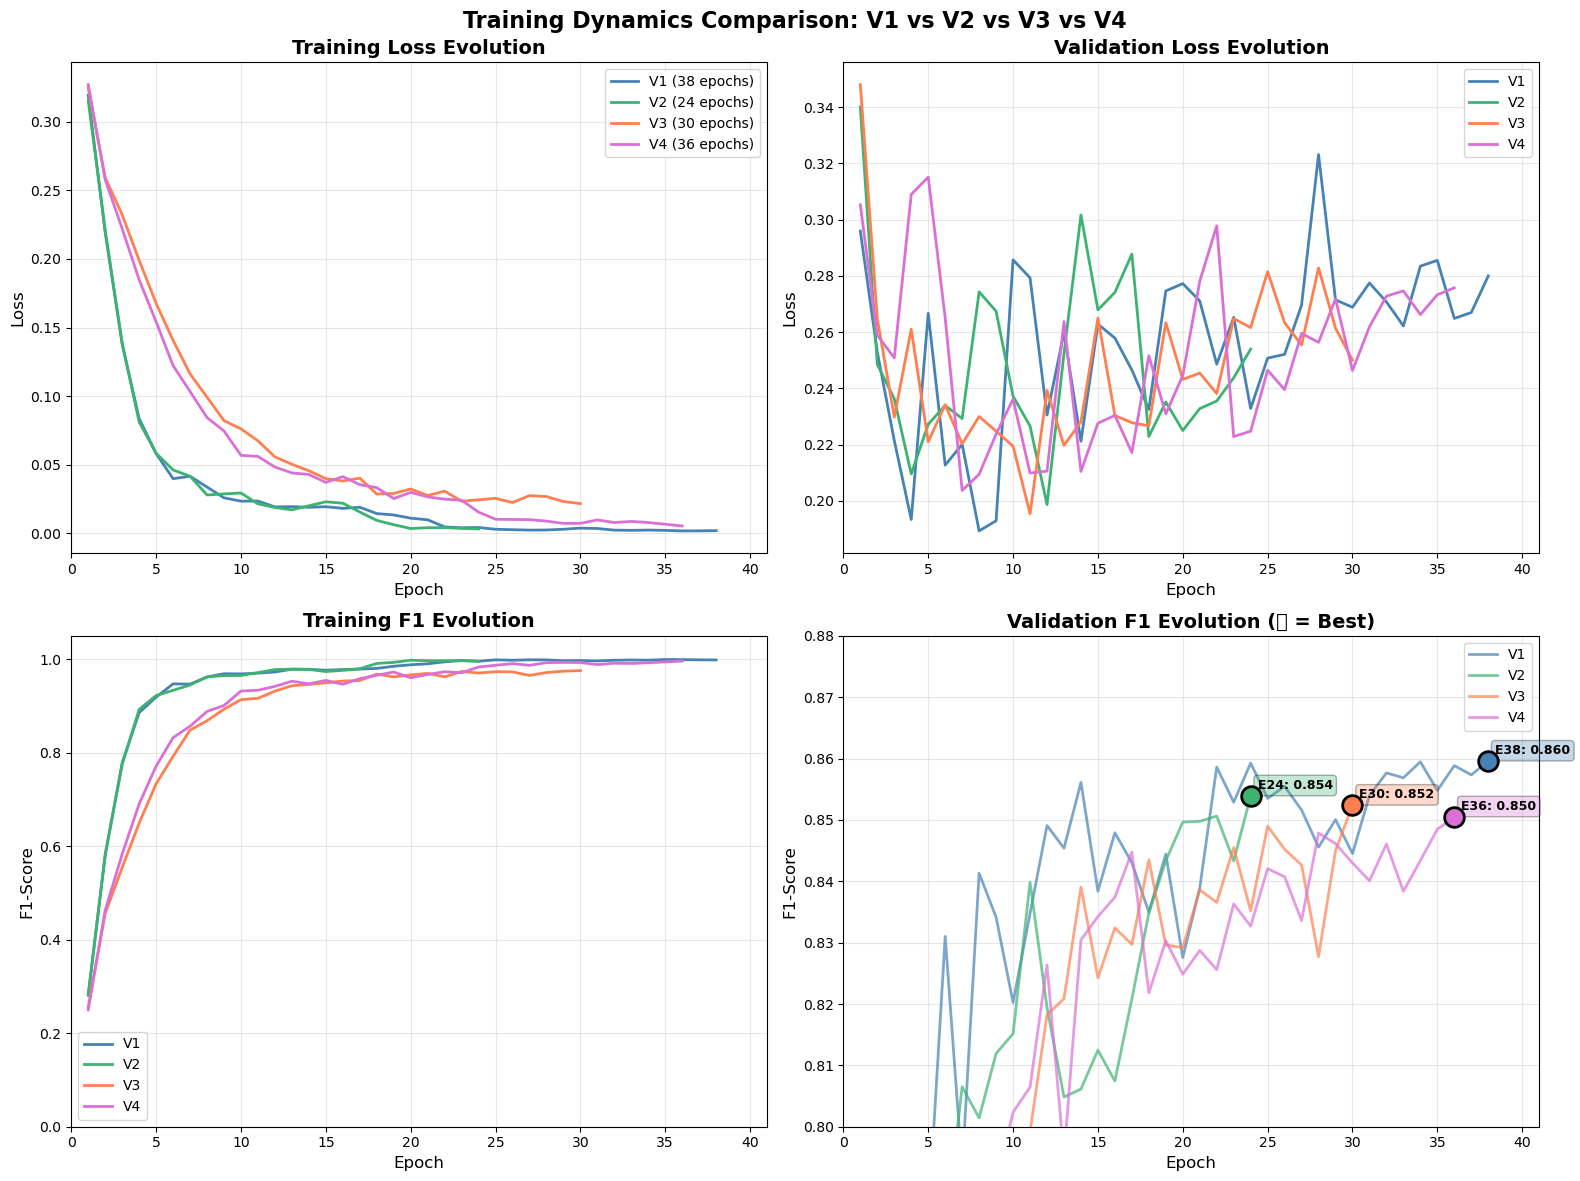


✅ Gráfico salvo: training_curves_comparison_all.png


In [14]:
# ==================== TRAINING CURVES (CORRIGIDO) ====================
import matplotlib.pyplot as plt
import numpy as np

# Histories já carregados
configs = ['v1', 'v2', 'v3', 'v4']
colors = {'v1': 'steelblue', 'v2': 'mediumseagreen', 'v3': 'coral', 'v4': 'orchid'}

# ==================== PLOT COM EPOCHS DINÂMICOS ====================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training Dynamics Comparison: V1 vs V2 vs V3 vs V4', 
             fontsize=16, fontweight='bold')

# PLOT 1: Train Loss
ax = axes[0, 0]
for config in configs:
    if config in histories:
        num_epochs = len(histories[config]['train_loss'])
        epochs = range(1, num_epochs + 1)
        ax.plot(epochs, histories[config]['train_loss'], 
               label=f'{config.upper()} ({num_epochs} epochs)', 
               color=colors[config], linewidth=2)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Training Loss Evolution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim([0, 41])

# PLOT 2: Val Loss
ax = axes[0, 1]
for config in configs:
    if config in histories:
        num_epochs = len(histories[config]['val_loss'])
        epochs = range(1, num_epochs + 1)
        ax.plot(epochs, histories[config]['val_loss'], 
               label=f'{config.upper()}', 
               color=colors[config], linewidth=2)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Validation Loss Evolution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim([0, 41])

# PLOT 3: Train F1
ax = axes[1, 0]
for config in configs:
    if config in histories:
        num_epochs = len(histories[config]['train_f1'])
        epochs = range(1, num_epochs + 1)
        ax.plot(epochs, histories[config]['train_f1'], 
               label=f'{config.upper()}', 
               color=colors[config], linewidth=2)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Training F1 Evolution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim([0, 41])
ax.set_ylim([0, 1.05])

# PLOT 4: Val F1 (com best epoch marcado)
ax = axes[1, 1]
for config in configs:
    if config in histories:
        val_f1 = histories[config]['val_f1']
        num_epochs = len(val_f1)
        epochs = range(1, num_epochs + 1)
        
        ax.plot(epochs, val_f1, 
               label=f'{config.upper()}', 
               color=colors[config], linewidth=2, alpha=0.7)
        
        # Marcar best epoch
        best_epoch = np.argmax(val_f1)
        best_f1 = val_f1[best_epoch]
        ax.scatter(best_epoch + 1, best_f1, 
                  color=colors[config], s=200, zorder=5, 
                  edgecolor='black', linewidth=2)
        ax.annotate(f'E{best_epoch + 1}: {best_f1:.3f}', 
                   xy=(best_epoch + 1, best_f1), 
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor=colors[config], alpha=0.3))

ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Validation F1 Evolution (⭐ = Best)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim([0, 41])
ax.set_ylim([0.80, 0.88])

plt.tight_layout()
plt.savefig('training_curves_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico salvo: training_curves_comparison_all.png")

BEST EPOCH ANALYSIS

V1
Best Epoch:           38/40
Best Val F1:          0.8596
Train F1 (at best):   0.9984
Gap (Train - Val):    0.1388 (16.2%)
Val Loss (at best):   0.2800
Train Loss (at best): 0.0017
Plateau after:        Epoch 38
Epochs wasted:        2 epochs

📊 Overfitting progression:
  Train F1: 0.9984 → 0.9984 (+0.0000)
  Val F1:   0.8596 → 0.8596 (+0.0000)

V2
Best Epoch:           24/40
Best Val F1:          0.8539
Train F1 (at best):   0.9957
Gap (Train - Val):    0.1418 (16.6%)
Val Loss (at best):   0.2540
Train Loss (at best): 0.0030
Plateau after:        Epoch 24
Epochs wasted:        16 epochs

📊 Overfitting progression:
  Train F1: 0.9957 → 0.9957 (+0.0000)
  Val F1:   0.8539 → 0.8539 (+0.0000)

V3
Best Epoch:           30/40
Best Val F1:          0.8524
Train F1 (at best):   0.9755
Gap (Train - Val):    0.1231 (14.4%)
Val Loss (at best):   0.2501
Train Loss (at best): 0.0215
Plateau after:        Epoch 30
Epochs wasted:        10 epochs

📊 Overfitting progression:
 

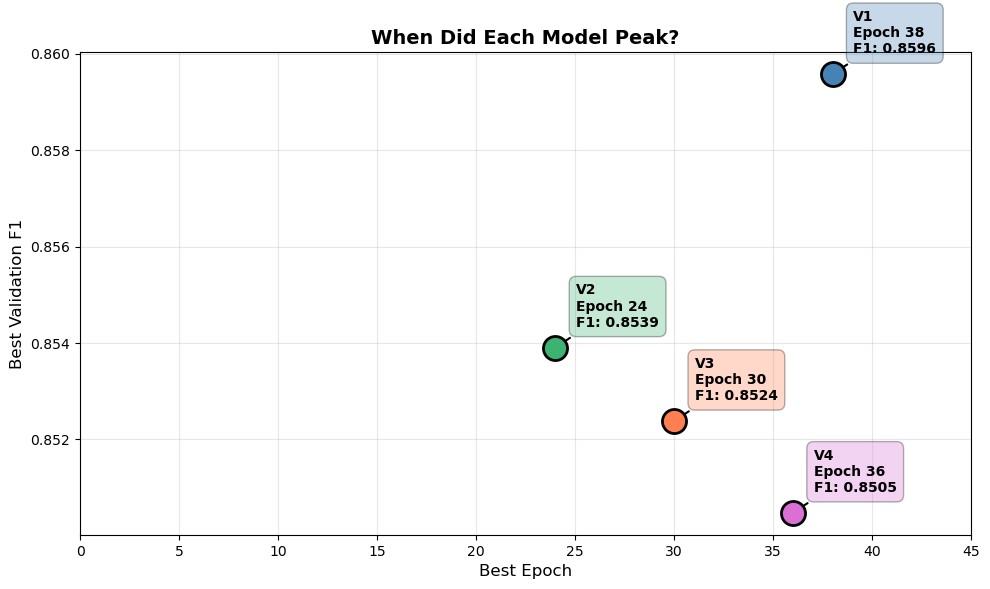


✅ Análise completa! Verificar imagens geradas.


In [15]:
# ==================== ANÁLISE DE BEST EPOCHS ====================

print("="*70)
print("BEST EPOCH ANALYSIS")
print("="*70)

best_epochs_data = []

for config in configs:
    if config not in histories:
        continue
    
    val_f1 = histories[config]['val_f1']
    train_f1 = histories[config]['train_f1']
    val_loss = histories[config]['val_loss']
    train_loss = histories[config]['train_loss']
    
    best_epoch = np.argmax(val_f1)
    best_val_f1 = val_f1[best_epoch]
    
    # Métricas no best epoch
    train_f1_at_best = train_f1[best_epoch]
    val_loss_at_best = val_loss[best_epoch]
    train_loss_at_best = train_loss[best_epoch]
    
    # Gap train-val
    gap_f1 = train_f1_at_best - best_val_f1
    
    # Verificar se houve early plateau
    plateau_start = None
    for i in range(best_epoch + 1, len(val_f1)):
        if val_f1[i] < best_val_f1 - 0.005:  # Se caiu >0.5%
            plateau_start = i
            break
    
    if plateau_start is None:
        plateau_start = len(val_f1)
    
    print(f"\n{'='*70}")
    print(f"{config.upper()}")
    print(f"{'='*70}")
    print(f"Best Epoch:           {best_epoch + 1}/40")
    print(f"Best Val F1:          {best_val_f1:.4f}")
    print(f"Train F1 (at best):   {train_f1_at_best:.4f}")
    print(f"Gap (Train - Val):    {gap_f1:.4f} ({gap_f1/best_val_f1*100:.1f}%)")
    print(f"Val Loss (at best):   {val_loss_at_best:.4f}")
    print(f"Train Loss (at best): {train_loss_at_best:.4f}")
    print(f"Plateau after:        Epoch {plateau_start}")
    print(f"Epochs wasted:        {40 - plateau_start} epochs")
    
    # Verificar overfitting progression
    if plateau_start < 40:
        final_train_f1 = train_f1[-1]
        final_val_f1 = val_f1[-1]
        overfit_increase = (final_train_f1 - train_f1_at_best)
        
        print(f"\n📊 Overfitting progression:")
        print(f"  Train F1: {train_f1_at_best:.4f} → {final_train_f1:.4f} (+{overfit_increase:.4f})")
        print(f"  Val F1:   {best_val_f1:.4f} → {final_val_f1:.4f} ({final_val_f1 - best_val_f1:+.4f})")
    
    best_epochs_data.append({
        'config': config,
        'best_epoch': best_epoch + 1,
        'best_val_f1': best_val_f1,
        'train_f1_at_best': train_f1_at_best,
        'gap_percent': gap_f1/best_val_f1*100,
        'plateau_epoch': plateau_start
    })

# Criar tabela comparativa
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)

import pandas as pd
df_epochs = pd.DataFrame(best_epochs_data)
df_epochs = df_epochs.sort_values('best_val_f1', ascending=False)
print(df_epochs.to_string(index=False))

# Plot best epochs
fig, ax = plt.subplots(figsize=(10, 6))

for data in best_epochs_data:
    config = data['config']
    best_epoch = data['best_epoch']
    best_val_f1 = data['best_val_f1']
    
    ax.scatter(best_epoch, best_val_f1, s=300, color=colors[config], 
              edgecolor='black', linewidth=2, zorder=5, label=config.upper())
    ax.annotate(f"{config.upper()}\nEpoch {best_epoch}\nF1: {best_val_f1:.4f}", 
               xy=(best_epoch, best_val_f1), 
               xytext=(15, 15), textcoords='offset points',
               fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[config], alpha=0.3),
               arrowprops=dict(arrowstyle='->', lw=1.5))

ax.set_xlabel('Best Epoch', fontsize=12)
ax.set_ylabel('Best Validation F1', fontsize=12)
ax.set_title('When Did Each Model Peak?', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.set_xlim([0, 45])

plt.tight_layout()
plt.savefig('best_epochs_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Análise completa! Verificar imagens geradas.")

TRANSFORM VERIFICATION
  📂 test: 959 pacients, 1748 images
  📂 test: 959 pacients, 1748 images
  📂 test: 959 pacients, 1748 images
  📂 test: 959 pacients, 1748 images

V1:
  Patient ID: 2678
  Image shape: torch.Size([3, 224, 224])
  Image mean: -0.9518
  Image std: 1.0482
  Min/Max: -2.1179 / 2.2489
  ⚠️ Normalization unexpected!

V2:
  Patient ID: 2678
  Image shape: torch.Size([3, 224, 224])
  Image mean: -0.9357
  Image std: 1.0486
  Min/Max: -2.1179 / 2.2489
  ⚠️ Normalization unexpected!

V3:
  Patient ID: 2678
  Image shape: torch.Size([3, 224, 224])
  Image mean: -0.8797
  Image std: 1.1988
  Min/Max: -2.1179 / 2.2489
  ⚠️ Normalization unexpected!

V4:
  Patient ID: 2678
  Image shape: torch.Size([3, 224, 224])
  Image mean: -0.8680
  Image std: 1.1381
  Min/Max: -2.1179 / 2.0609
  ⚠️ Normalization unexpected!


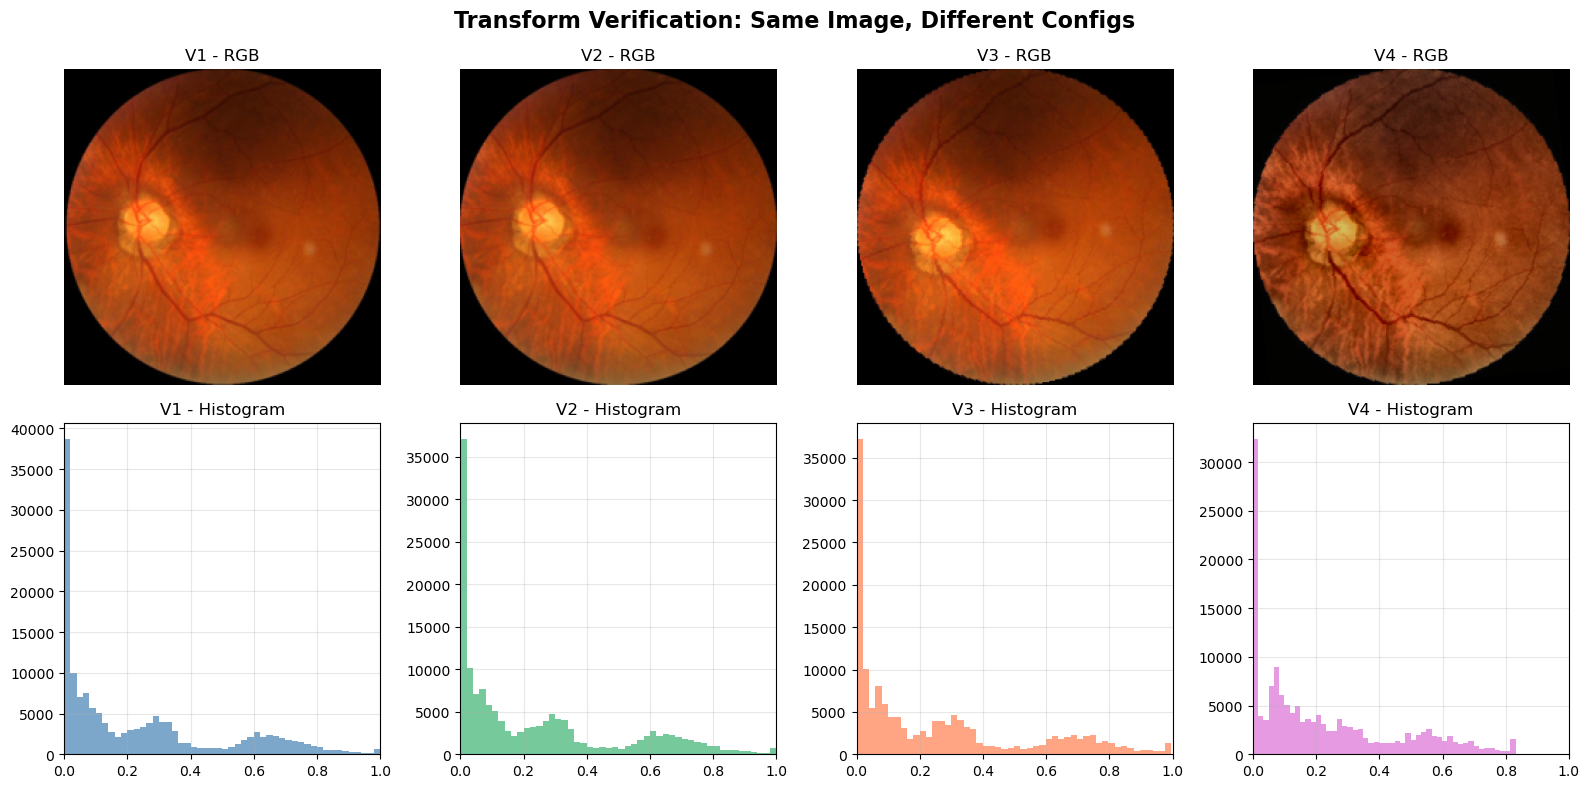


✅ Transform verification complete!


In [16]:
# ==================== VERIFICAR TRANSFORMS ====================
import torch
from torchvision import transforms

print("="*70)
print("TRANSFORM VERIFICATION")
print("="*70)

# Criar datasets
datasets_verify = {
    'v1': ODIRDataset('test', transform=get_v1_baseline_transform()),
    'v2': ODIRDataset('test', transform=get_v2_crop_only_transform()),
    'v3': ODIRDataset('test', transform=get_v3_crop_aug_transform()),
    'v4': ODIRDataset('test', transform=get_v4_full_pipeline_transform())
}

# Pegar mesma imagem em todos
sample_idx = 0
original_img_path = None

for config, dataset in datasets_verify.items():
    img, labels, patient_id = dataset[sample_idx]
    
    print(f"\n{config.upper()}:")
    print(f"  Patient ID: {patient_id}")
    print(f"  Image shape: {img.shape}")
    print(f"  Image mean: {img.mean():.4f}")
    print(f"  Image std: {img.std():.4f}")
    print(f"  Min/Max: {img.min():.4f} / {img.max():.4f}")
    
    # Verificar normalização
    expected_mean = 0.0  # Aproximado, ImageNet normalized
    expected_std = 1.0
    
    actual_mean = img.mean()
    actual_std = img.std()
    
    if abs(actual_mean) < 0.5 and 0.5 < actual_std < 1.5:
        print(f"  ✅ Normalization OK")
    else:
        print(f"  ⚠️ Normalization unexpected!")

# Visualizar diferenças
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Transform Verification: Same Image, Different Configs', 
             fontsize=16, fontweight='bold')

for idx, (config, dataset) in enumerate(datasets_verify.items()):
    # Sem augmentation (usar transform de test)
    img, _, patient_id = dataset[sample_idx]
    
    # Denormalize para visualização
    img_vis = img.numpy().transpose(1, 2, 0)
    img_vis = img_vis * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img_vis = np.clip(img_vis, 0, 1)
    
    # Plot original
    axes[0, idx].imshow(img_vis)
    axes[0, idx].set_title(f'{config.upper()} - RGB')
    axes[0, idx].axis('off')
    
    # Plot histogram
    axes[1, idx].hist(img_vis.ravel(), bins=50, color=colors[config], alpha=0.7)
    axes[1, idx].set_title(f'{config.upper()} - Histogram')
    axes[1, idx].set_xlim([0, 1])
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('transform_verification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Transform verification complete!")

In [17]:
# ==================== ERROR ANALYSIS ====================

# Carregar modelos
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

models = {}
for config in configs:
    model = EfficientNetB0MultiLabel(num_classes=8).to(device)
    checkpoint = torch.load(f'efficientnet_{config}_best.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    models[config] = model

# Dataset de teste (usar V1 transform para comparação justa)
test_dataset = ODIRDataset('test', transform=get_val_test_transform())
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Fazer predições
all_predictions = {config: [] for config in configs}
all_labels = []
all_patient_ids = []

print("🔍 Fazendo predições com todos os modelos...")

with torch.no_grad():
    for images, labels, patient_ids in tqdm(test_loader):
        images = images.to(device)
        
        for config, model in models.items():
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy()
            all_predictions[config].append(preds)
        
        all_labels.append(labels.numpy())
        all_patient_ids.extend(patient_ids)

# Concatenar
for config in configs:
    all_predictions[config] = np.vstack(all_predictions[config])

all_labels = np.vstack(all_labels)

print(f"\n✅ Predições completas: {len(all_patient_ids)} pacientes")

# Binarizar predições
threshold = 0.5
predictions_binary = {
    config: (preds > threshold).astype(int) 
    for config, preds in all_predictions.items()
}

# Encontrar disagreements
print("\n" + "="*70)
print("DISAGREEMENT ANALYSIS")
print("="*70)

class_names = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Casos onde V1 acerta e V3 erra (e vice-versa)
v1_correct = (predictions_binary['v1'] == all_labels)
v3_correct = (predictions_binary['v3'] == all_labels)

v1_wins = v1_correct & ~v3_correct
v3_wins = ~v1_correct & v3_correct

print(f"\nV1 acerta e V3 erra: {v1_wins.sum()} casos")
print(f"V3 acerta e V1 erra: {v3_wins.sum()} casos")
print(f"Ambos acertam: {(v1_correct & v3_correct).sum()} casos")
print(f"Ambos erram: {(~v1_correct & ~v3_correct).sum()} casos")

# Ver padrões por classe
print("\n📊 Disagreements por classe:")
for class_idx, class_name in enumerate(class_names):
    v1_class_wins = v1_wins[:, class_idx].sum()
    v3_class_wins = v3_wins[:, class_idx].sum()
    
    print(f"\n{class_name}:")
    print(f"  V1 wins: {v1_class_wins} casos")
    print(f"  V3 wins: {v3_class_wins} casos")
    print(f"  Net: V1 {'+' if v1_class_wins > v3_class_wins else ''}{v1_class_wins - v3_class_wins}")

# Encontrar "hard cases" - onde TODOS erraram
all_wrong = np.ones(all_labels.shape, dtype=bool)
for config in configs:
    all_wrong &= (predictions_binary[config] != all_labels)

hard_cases_count = all_wrong.sum(axis=0)

print("\n🔴 HARD CASES (todos os modelos erraram):")
for class_idx, class_name in enumerate(class_names):
    count = hard_cases_count[class_idx]
    total = all_labels[:, class_idx].sum()
    pct = count / total * 100 if total > 0 else 0
    print(f"  {class_name}: {count}/{total} ({pct:.1f}%)")

print("\n✅ Error analysis complete!")

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
  📂 test: 959 pacients, 1748 images
🔍 Fazendo predições com todos os modelos...


100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


✅ Predições completas: 959 pacientes

DISAGREEMENT ANALYSIS

V1 acerta e V3 erra: 145 casos
V3 acerta e V1 erra: 128 casos
Ambos acertam: 7184 casos
Ambos erram: 215 casos

📊 Disagreements por classe:

N:
  V1 wins: 43 casos
  V3 wins: 45 casos
  Net: V1 -2

D:
  V1 wins: 44 casos
  V3 wins: 29 casos
  Net: V1 +15

G:
  V1 wins: 6 casos
  V3 wins: 4 casos
  Net: V1 +2

C:
  V1 wins: 3 casos
  V3 wins: 4 casos
  Net: V1 -1

A:
  V1 wins: 3 casos
  V3 wins: 1 casos
  Net: V1 +2

H:
  V1 wins: 0 casos
  V3 wins: 1 casos
  Net: V1 -1

M:
  V1 wins: 2 casos
  V3 wins: 1 casos
  Net: V1 +1

O:
  V1 wins: 44 casos
  V3 wins: 43 casos
  Net: V1 +1

🔴 HARD CASES (todos os modelos erraram):
  N: 38/299.0 (12.7%)
  D: 35/340.0 (10.3%)
  G: 13/69.0 (18.8%)
  C: 6/59.0 (10.2%)
  A: 12/51.0 (23.5%)
  H: 14/42.0 (33.3%)
  M: 2/42.0 (4.8%)
  O: 32/229.0 (14.0%)

✅ Error analysis complete!


In [18]:
# ==================== STATISTICAL SIGNIFICANCE ====================
from scipy import stats

print("="*70)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*70)

# Per-sample F1 scores
per_sample_f1 = {}

for config in configs:
    preds = predictions_binary[config]
    labels = all_labels
    
    # Calcular F1 por amostra
    sample_f1s = []
    for i in range(len(preds)):
        if labels[i].sum() == 0:  # Skip if no positive labels
            continue
        f1 = f1_score(labels[i], preds[i], average='macro', zero_division=0)
        sample_f1s.append(f1)
    
    per_sample_f1[config] = np.array(sample_f1s)

# T-tests pairwise
print("\n📊 Paired t-tests (V1 vs others):")

for config in ['v2', 'v3', 'v4']:
    t_stat, p_value = stats.ttest_rel(per_sample_f1['v1'], per_sample_f1[config])
    
    mean_v1 = per_sample_f1['v1'].mean()
    mean_other = per_sample_f1[config].mean()
    
    print(f"\nV1 vs {config.upper()}:")
    print(f"  V1 mean:     {mean_v1:.4f}")
    print(f"  {config.upper()} mean:     {mean_other:.4f}")
    print(f"  Difference:  {mean_v1 - mean_other:+.4f}")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value:     {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  ✅ SIGNIFICANT difference (p < 0.05)")
    else:
        print(f"  ⚠️ NOT significant (p ≥ 0.05) - likely RANDOM!")

# Effect size (Cohen's d)
print("\n📏 Effect Sizes (Cohen's d):")
for config in ['v2', 'v3', 'v4']:
    pooled_std = np.sqrt((per_sample_f1['v1'].std()**2 + per_sample_f1[config].std()**2) / 2)
    cohens_d = (per_sample_f1['v1'].mean() - per_sample_f1[config].mean()) / pooled_std
    
    print(f"V1 vs {config.upper()}: d = {cohens_d:.3f}", end="")
    
    if abs(cohens_d) < 0.2:
        print(" (negligible)")
    elif abs(cohens_d) < 0.5:
        print(" (small)")
    elif abs(cohens_d) < 0.8:
        print(" (medium)")
    else:
        print(" (large)")

print("\n✅ Statistical analysis complete!")

STATISTICAL SIGNIFICANCE TESTS

📊 Paired t-tests (V1 vs others):

V1 vs V2:
  V1 mean:     0.9054
  V2 mean:     0.9066
  Difference:  -0.0012
  t-statistic: -0.259
  p-value:     0.7960
  ⚠️ NOT significant (p ≥ 0.05) - likely RANDOM!

V1 vs V3:
  V1 mean:     0.9054
  V3 mean:     0.8951
  Difference:  +0.0103
  t-statistic: 1.982
  p-value:     0.0477
  ✅ SIGNIFICANT difference (p < 0.05)

V1 vs V4:
  V1 mean:     0.9054
  V4 mean:     0.8549
  Difference:  +0.0505
  t-statistic: 7.491
  p-value:     0.0000
  ✅ SIGNIFICANT difference (p < 0.05)

📏 Effect Sizes (Cohen's d):
V1 vs V2: d = -0.006 (negligible)
V1 vs V3: d = 0.050 (negligible)
V1 vs V4: d = 0.231 (small)

✅ Statistical analysis complete!


In [11]:
class FocalLoss(nn.Module):
    """
    Focal Loss para multi-label classification
    
    Foca em exemplos difíceis sem forçar agressividade em classes raras
    
    Args:
        alpha (float): Balanceamento positivo/negativo (default: 0.25)
        gamma (float): Focusing parameter (default: 2.0)
            - gamma=0: equivale a BCE
            - gamma=2: foco moderado em difíceis (RECOMENDADO)
            - gamma=5: foco forte em difíceis
    """
    
    def __init__(self, alpha=0.25, gamma=3.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        """
        Args:
            inputs: logits (before sigmoid), shape [batch, num_classes]
            targets: ground truth labels, shape [batch, num_classes]
        """
        # BCE loss
        bce_loss = F.binary_cross_entropy_with_logits(
            inputs, targets, reduction='none'
        )
        
        # Probabilidades
        probs = torch.sigmoid(inputs)
        
        # p_t: probabilidade da classe correta
        # Se target=1: p_t = prob
        # Se target=0: p_t = 1-prob
        p_t = probs * targets + (1 - probs) * (1 - targets)
        
        # Focal term: (1 - p_t)^gamma
        # Exemplos fáceis (p_t alto) → peso baixo
        # Exemplos difíceis (p_t baixo) → peso alto
        focal_weight = (1 - p_t) ** self.gamma
        
        # Alpha balancing
        # targets=1 → alpha
        # targets=0 → 1-alpha
        alpha_weight = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        
        # Focal loss final
        focal_loss = alpha_weight * focal_weight * bce_loss
        
        return focal_loss.mean()


In [13]:
# ==================== FUNÇÃO CORRIGIDA ====================

def compare_v3_v4_focal(num_epochs=10):
    """
    Testar V3 E V4 com Focal Loss
    """
    
    print(f"\n{'='*70}")
    print("🔥 COMPARATIVE TEST: V3 vs V4 WITH FOCAL LOSS")
    print(f"{'='*70}")
    print(f"Both configs will be tested with:")
    print(f"  - dropout=0.2")
    print(f"  - weight_decay=1e-4")
    print(f"  - lr=1e-4")
    print(f"  - Focal Loss (alpha=0.25, gamma=2.0)")
    print(f"  - {num_epochs} epochs")
    print(f"\nFocal Loss advantages:")
    print(f"  ✅ Focuses on HARD examples (not just rare classes)")
    print(f"  ✅ No aggressive predictions → better precision")
    print(f"  ✅ Better than class weights for imbalanced data")
    print(f"\nTotal time: ~{num_epochs*5*2} minutes")
    print(f"{'='*70}")
    
    # ==================== V3 TRANSFORMS ====================
    def get_v3_improved_transform():
        """V3: Crop + Aug moderado"""
        return transforms.Compose([
            CropOnly(),
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=5),
            transforms.ColorJitter(brightness=0.1, contrast=0.1),
            transforms.ToTensor(),
            transforms.RandomErasing(p=0.2, scale=(0.02, 0.1)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
    
    def get_v3_val_transform():
        """V3 validation"""
        return transforms.Compose([
            CropOnly(),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
    
    # ==================== V4 TRANSFORMS ====================
    def get_v4_optimized_transform():
        """V4: CLAHE adaptativo + Aug moderado"""
        return transforms.Compose([
            ApplyCLAHEandCrop_Adaptive(),
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=5),
            transforms.ColorJitter(brightness=0.1, contrast=0.0),
            transforms.ToTensor(),
            transforms.RandomErasing(p=0.2, scale=(0.02, 0.1)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
    
    def get_v4_val_transform():
        """V4 validation"""
        return transforms.Compose([
            ApplyCLAHEandCrop_Adaptive(),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])

    # ==================== TEST V3 WITH FOCAL LOSS ====================
    print(f"\n\n{'#'*70}")
    print("### TESTING V3 WITH FOCAL LOSS ###")
    print(f"{'#'*70}")
    
    train_v3 = ODIRDataset('train', transform=get_v3_improved_transform())
    val_v3 = ODIRDataset('val', transform=get_v3_val_transform())
    test_v3 = ODIRDataset('test', transform=get_v3_val_transform())
    
    results_v3, model_v3, history_v3 = train_model_complete(
        train_v3, val_v3, test_v3,
        config_name='v3_focal_10ep',
        num_epochs=num_epochs,
        batch_size=32,
        lr=1e-4,
        use_class_weights=False,
        use_focal_loss=True  # ← FOCAL LOSS!
    )
    
    # ==================== TEST V4 WITH FOCAL LOSS ====================
    print(f"\n\n{'#'*70}")
    print("### TESTING V4 WITH FOCAL LOSS ###")
    print(f"{'#'*70}")
    
    train_v4 = ODIRDataset('train', transform=get_v4_optimized_transform())
    val_v4 = ODIRDataset('val', transform=get_v4_val_transform())
    test_v4 = ODIRDataset('test', transform=get_v4_val_transform())
    
    results_v4, model_v4, history_v4 = train_model_complete(
        train_v4, val_v4, test_v4,
        config_name='v4_focal_10ep',
        num_epochs=num_epochs,
        batch_size=32,
        lr=1e-4,
        use_class_weights=False,
        use_focal_loss=True  # ← FOCAL LOSS!
    )
    
    # ==================== BASIC COMPARISON ====================
    print(f"\n\n{'='*70}")
    print("📊 BASIC COMPARISON: V3 vs V4 (FOCAL LOSS)")
    print(f"{'='*70}")

    v3_final_train = history_v3['train_f1'][-1]
    v3_final_val = history_v3['val_f1'][-1]
    v3_gap = (v3_final_train - v3_final_val) / v3_final_val * 100
    
    v4_final_train = history_v4['train_f1'][-1]
    v4_final_val = history_v4['val_f1'][-1]
    v4_gap = (v4_final_train - v4_final_val) / v4_final_val * 100
    
    print(f"\nV3 + Focal Loss:")
    print(f"  Train F1:    {v3_final_train:.4f}")
    print(f"  Val F1:      {v3_final_val:.4f}")
    print(f"  Best Val F1: {results_v3['best_val_f1']:.4f}")
    print(f"  Test F1:     {results_v3['test_f1']:.4f}")
    print(f"  Gap:         {v3_gap:.1f}%")
    
    print(f"\nV4 + Focal Loss:")
    print(f"  Train F1:    {v4_final_train:.4f}")
    print(f"  Val F1:      {v4_final_val:.4f}")
    print(f"  Best Val F1: {results_v4['best_val_f1']:.4f}")
    print(f"  Test F1:     {results_v4['test_f1']:.4f}")
    print(f"  Gap:         {v4_gap:.1f}%")
    
    # Winner
    if v4_final_val > v3_final_val:
        winner = 'v4'
        print(f"\n✅ V4 + Focal Loss WINS!")
    else:
        winner = 'v3'
        print(f"\n✅ V3 + Focal Loss WINS!")
    
    print(f"{'='*70}\n")
    
    return winner, {
        'v3': {'results': results_v3, 'history': history_v3, 'model': model_v3},
        'v4': {'results': results_v4, 'history': history_v4, 'model': model_v4}
    }


# ==================== EXECUTAR ====================

print("\n" + "="*70)
print("🔥 STARTING FOCAL LOSS TEST")
print("="*70)

winner, results = compare_v3_v4_focal(num_epochs=10)

# ==================== ANÁLISE DETALHADA ====================

print("\n" + "="*70)
print("📊 DETAILED ANALYSIS: FOCAL LOSS vs BASELINES")
print("="*70)

# Baselines
baselines = {
    'V3 sqrt weights': {'A': 0.8043, 'H': 0.8169, 'M': 0.9048, 'test': 0.8153},
    'V4 sqrt weights': {'A': 0.7865, 'H': 0.7246, 'M': 0.8478, 'test': 0.8116},
    'V4 sem weights':  {'A': 0.7229, 'H': 0.7647, 'M': 0.9383, 'test': 0.8143}
}

# Resultados com Focal Loss
v3_results = results['v3']['results']
v4_results = results['v4']['results']

v3_focal = {
    'test': v3_results['test_f1'],
    'A': v3_results['per_class_f1']['A'],
    'H': v3_results['per_class_f1']['H'],
    'M': v3_results['per_class_f1']['M']
}

v4_focal = {
    'test': v4_results['test_f1'],
    'A': v4_results['per_class_f1']['A'],
    'H': v4_results['per_class_f1']['H'],
    'M': v4_results['per_class_f1']['M']
}

print(f"\n{'Method':<25} {'Test F1':<10} {'A':<8} {'H':<8} {'M':<8}")
print("-" * 70)
print(f"{'V3 sqrt weights':<25} {baselines['V3 sqrt weights']['test']:.4f}     "
      f"{baselines['V3 sqrt weights']['A']:.4f}   "
      f"{baselines['V3 sqrt weights']['H']:.4f}   "
      f"{baselines['V3 sqrt weights']['M']:.4f}")
print(f"{'V3 FOCAL LOSS':<25} {v3_focal['test']:.4f}     "
      f"{v3_focal['A']:.4f}   {v3_focal['H']:.4f}   {v3_focal['M']:.4f}")
print()
print(f"{'V4 sqrt weights':<25} {baselines['V4 sqrt weights']['test']:.4f}     "
      f"{baselines['V4 sqrt weights']['A']:.4f}   "
      f"{baselines['V4 sqrt weights']['H']:.4f}   "
      f"{baselines['V4 sqrt weights']['M']:.4f}")
print(f"{'V4 FOCAL LOSS':<25} {v4_focal['test']:.4f}     "
      f"{v4_focal['A']:.4f}   {v4_focal['H']:.4f}   {v4_focal['M']:.4f}")
print()
print(f"{'V4 sem weights':<25} {baselines['V4 sem weights']['test']:.4f}     "
      f"{baselines['V4 sem weights']['A']:.4f}   "
      f"{baselines['V4 sem weights']['H']:.4f}   "
      f"{baselines['V4 sem weights']['M']:.4f}")
print("-" * 70)

# ==================== DECISÃO ====================

print(f"\n{'='*70}")
print("🎯 FINAL DECISION")
print(f"{'='*70}")

best_test = max(v3_focal['test'], v4_focal['test'])
best_config = 'V3' if v3_focal['test'] >= v4_focal['test'] else 'V4'

print(f"\nBEST WITH FOCAL LOSS: {best_config}")
print(f"  Test F1: {best_test:.4f}")
print(f"  A: {v3_focal['A'] if best_config=='V3' else v4_focal['A']:.4f}")
print(f"  H: {v3_focal['H'] if best_config=='V3' else v4_focal['H']:.4f}")
print(f"  M: {v3_focal['M'] if best_config=='V3' else v4_focal['M']:.4f}")

# Comparar com melhor baseline
best_baseline_test = max([b['test'] for b in baselines.values()])

if best_test > best_baseline_test:
    print(f"\n✅ FOCAL LOSS WINS!")
    print(f"   Better than best baseline: {best_test:.4f} vs {best_baseline_test:.4f}")
    print(f"\n   → Train {best_config} for 40 epochs with Focal Loss! 🚀")
    decision = f"{best_config}_FOCAL_40EP"
elif best_test > 0.82:
    print(f"\n🟢 FOCAL LOSS GOOD!")
    print(f"   Close to baselines: {best_test:.4f} vs {best_baseline_test:.4f}")
    print(f"\n   → Consider 40 epochs with Focal Loss")
    decision = f"{best_config}_FOCAL_40EP"
else:
    print(f"\n⚠️  FOCAL LOSS NOT HELPING MUCH")
    print(f"   Test: {best_test:.4f} vs best baseline: {best_baseline_test:.4f}")
    print(f"\n   RECOMMENDATION: V4 WITHOUT weights + threshold opt")
    decision = "V4_NO_WEIGHTS"

print(f"\n{'='*70}")
print(f"🚀 DECISION: {decision}")
print(f"{'='*70}\n")

# ==================== EXECUTAR E ANALISAR ====================

print("\n" + "="*70)
print("🚀 STARTING COMPARATIVE TEST")
print("="*70)

# Executar teste
winner, results = compare_v3_v4(num_epochs=10, use_class_weights=True)

# ==================== ANÁLISE DETALHADA ====================

print("\n" + "="*70)
print("📊 DETAILED ANALYSIS WITH CLIPPED WEIGHTS")
print("="*70)

# Baselines para comparar
baselines = {
    'V3 sqrt (não clip)': {'A': 0.8043, 'H': 0.8169, 'M': 0.9048, 'test': 0.8153},
    'V4 sqrt (não clip)': {'A': 0.7865, 'H': 0.7246, 'M': 0.8478, 'test': 0.8116},
    'V4 sem weights':     {'A': 0.7229, 'H': 0.7647, 'M': 0.9383, 'test': 0.8143}
}

# Resultados V3 e V4 com clipped
v3_results = results['v3']['results']
v4_results = results['v4']['results']

v3_A = v3_results['per_class_f1']['A']
v3_H = v3_results['per_class_f1']['H']
v3_M = v3_results['per_class_f1']['M']
v3_test = v3_results['test_f1']

v4_A = v4_results['per_class_f1']['A']
v4_H = v4_results['per_class_f1']['H']
v4_M = v4_results['per_class_f1']['M']
v4_test = v4_results['test_f1']

print(f"\n{'Config':<25} {'Test F1':<10} {'A':<8} {'H':<8} {'M':<8}")
print("-" * 70)
print(f"{'V3 sqrt (não clip)':<25} {baselines['V3 sqrt (não clip)']['test']:.4f}     "
      f"{baselines['V3 sqrt (não clip)']['A']:.4f}   "
      f"{baselines['V3 sqrt (não clip)']['H']:.4f}   "
      f"{baselines['V3 sqrt (não clip)']['M']:.4f}")
print(f"{'V3 CLIPPED (now)':<25} {v3_test:.4f}     {v3_A:.4f}   {v3_H:.4f}   {v3_M:.4f}")
print()
print(f"{'V4 sqrt (não clip)':<25} {baselines['V4 sqrt (não clip)']['test']:.4f}     "
      f"{baselines['V4 sqrt (não clip)']['A']:.4f}   "
      f"{baselines['V4 sqrt (não clip)']['H']:.4f}   "
      f"{baselines['V4 sqrt (não clip)']['M']:.4f}")
print(f"{'V4 CLIPPED (now)':<25} {v4_test:.4f}     {v4_A:.4f}   {v4_H:.4f}   {v4_M:.4f}")
print()
print(f"{'V4 sem weights':<25} {baselines['V4 sem weights']['test']:.4f}     "
      f"{baselines['V4 sem weights']['A']:.4f}   "
      f"{baselines['V4 sem weights']['H']:.4f}   "
      f"{baselines['V4 sem weights']['M']:.4f}")
print("-" * 70)

# ==================== VERIFICAR SE CLIPPING FUNCIONOU ====================

print(f"\n{'='*70}")
print("✅ VERIFICATION: DID CLIPPING FIX THE PROBLEMS?")
print(f"{'='*70}")

v4_improvements = {
    'H improved vs sqrt': v4_H > baselines['V4 sqrt (não clip)']['H'],
    'M preserved vs sqrt': v4_M > baselines['V4 sqrt (não clip)']['M'],
    'A maintained': v4_A > 0.76,
    'Overall improved': v4_test > baselines['V4 sqrt (não clip)']['test']
}

print(f"\nV4 WITH CLIPPING:")
for check, passed in v4_improvements.items():
    status = "✅" if passed else "❌"
    print(f"  {status} {check}")

if sum(v4_improvements.values()) >= 3:
    print(f"\n✅ CLIPPING WORKED FOR V4!")
    print(f"   H: {baselines['V4 sqrt (não clip)']['H']:.4f} → {v4_H:.4f} "
          f"({v4_H - baselines['V4 sqrt (não clip)']['H']:+.4f})")
    print(f"   M: {baselines['V4 sqrt (não clip)']['M']:.4f} → {v4_M:.4f} "
          f"({v4_M - baselines['V4 sqrt (não clip)']['M']:+.4f})")
else:
    print(f"\n⚠️  CLIPPING DIDN'T HELP MUCH FOR V4")

# ==================== DECISÃO FINAL ====================

print(f"\n{'='*70}")
print("🎯 FINAL DECISION: WHICH CONFIG FOR 40 EPOCHS?")
print(f"{'='*70}")

# Critérios
best_test = max(v3_test, v4_test)
best_A = max(v3_A, v4_A)
best_H = max(v3_H, v4_H)

print(f"\nBEST PERFORMERS:")
print(f"  Test F1: {'V3' if v3_test >= v4_test else 'V4'} ({best_test:.4f})")
print(f"  A (AMD): {'V3' if v3_A >= v4_A else 'V4'} ({best_A:.4f})")
print(f"  H (HTN): {'V3' if v3_H >= v4_H else 'V4'} ({best_H:.4f})")

# Decisão
if v4_test > v3_test and v4_H > 0.78 and v4_M > 0.90:
    print(f"\n✅ WINNER: V4 WITH CLIPPED WEIGHTS")
    print(f"   → Train V4 for 40 epochs with clipped weights!")
    final_decision = "V4_CLIPPED_40EP"
    
elif v3_test > v4_test and v3_H > 0.80 and v3_M > 0.90:
    print(f"\n✅ WINNER: V3 WITH CLIPPED WEIGHTS")
    print(f"   → Train V3 for 40 epochs with clipped weights!")
    final_decision = "V3_CLIPPED_40EP"
    
elif v4_test > 0.82 or v3_test > 0.82:
    best_config = 'V4' if v4_test >= v3_test else 'V3'
    print(f"\n🟢 GOOD: {best_config} with clipped weights shows promise")
    print(f"   → Consider 40 epochs with clipped weights")
    final_decision = f"{best_config}_CLIPPED_40EP"
    
else:
    print(f"\n⚠️  CLIPPED WEIGHTS NOT HELPING MUCH")
    print(f"   V3: {v3_test:.4f}, V4: {v4_test:.4f}")
    print(f"\n   RECOMMENDATION: V4 WITHOUT weights + threshold opt")
    print(f"   (V4 sem weights: 0.8143, proven to work)")
    final_decision = "V4_NO_WEIGHTS"

print(f"\n{'='*70}")
print(f"🚀 NEXT STEP: {final_decision}")
print(f"{'='*70}\n")

# ==================== GUARDAR DECISÃO ====================

decision_data = {
    'winner': winner,
    'final_decision': final_decision,
    'v3_results': {
        'test_f1': v3_test,
        'A': v3_A,
        'H': v3_H,
        'M': v3_M
    },
    'v4_results': {
        'test_f1': v4_test,
        'A': v4_A,
        'H': v4_H,
        'M': v4_M
    }
}

print(f"✅ Decision saved for next step!")


🔥 STARTING FOCAL LOSS TEST

🔥 COMPARATIVE TEST: V3 vs V4 WITH FOCAL LOSS
Both configs will be tested with:
  - dropout=0.2
  - weight_decay=1e-4
  - lr=1e-4
  - Focal Loss (alpha=0.25, gamma=2.0)
  - 10 epochs

Focal Loss advantages:
  ✅ Focuses on HARD examples (not just rare classes)
  ✅ No aggressive predictions → better precision
  ✅ Better than class weights for imbalanced data

Total time: ~100 minutes


######################################################################
### TESTING V3 WITH FOCAL LOSS ###
######################################################################
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images

TRAINING EFFICIENTNET-B0 - V3_FOCAL_10EP

📊 Model: 4,017,796 parameters
⚠️  Using standard BCE (no class weights)


Epoch 1/10 [Val]: 100%|██████████| 30/30 [00:14<00:00,  2.06it/s]



Epoch 1/10:
  Train - Loss: 0.4809, F1: 0.2443, Acc: 0.7956
  Val   - Loss: 0.2984, F1: 0.3659, Acc: 0.8703
  LR: 1.00e-04, Time: 245.0s
  ✅ Best model saved! (F1: 0.3659)


Epoch 2/10 [Val]: 100%|██████████| 30/30 [00:14<00:00,  2.12it/s]



Epoch 2/10:
  Train - Loss: 0.3025, F1: 0.3954, Acc: 0.8673
  Val   - Loss: 0.2672, F1: 0.4464, Acc: 0.8803
  LR: 1.00e-04, Time: 239.8s
  ✅ Best model saved! (F1: 0.4464)


Epoch 3/10 [Val]: 100%|██████████| 30/30 [00:13<00:00,  2.15it/s]



Epoch 3/10:
  Train - Loss: 0.2552, F1: 0.5021, Acc: 0.8881
  Val   - Loss: 0.2417, F1: 0.5425, Acc: 0.8947
  LR: 1.00e-04, Time: 242.0s
  ✅ Best model saved! (F1: 0.5425)


Epoch 4/10 [Val]: 100%|██████████| 30/30 [00:13<00:00,  2.16it/s]



Epoch 4/10:
  Train - Loss: 0.2112, F1: 0.6194, Acc: 0.9096
  Val   - Loss: 0.2209, F1: 0.6200, Acc: 0.9072
  LR: 1.00e-04, Time: 244.6s
  ✅ Best model saved! (F1: 0.6200)


Epoch 5/10 [Val]: 100%|██████████| 30/30 [00:13<00:00,  2.16it/s]



Epoch 5/10:
  Train - Loss: 0.1822, F1: 0.6782, Acc: 0.9250
  Val   - Loss: 0.2007, F1: 0.6823, Acc: 0.9178
  LR: 1.00e-04, Time: 244.1s
  ✅ Best model saved! (F1: 0.6823)


Epoch 6/10 [Val]: 100%|██████████| 30/30 [00:14<00:00,  2.09it/s]



Epoch 6/10:
  Train - Loss: 0.1514, F1: 0.7573, Acc: 0.9384
  Val   - Loss: 0.1922, F1: 0.7276, Acc: 0.9254
  LR: 1.00e-04, Time: 250.2s
  ✅ Best model saved! (F1: 0.7276)


Epoch 7/10 [Val]: 100%|██████████| 30/30 [00:18<00:00,  1.60it/s]



Epoch 7/10:
  Train - Loss: 0.1250, F1: 0.8010, Acc: 0.9513
  Val   - Loss: 0.1841, F1: 0.7703, Acc: 0.9320
  LR: 1.00e-04, Time: 251.8s
  ✅ Best model saved! (F1: 0.7703)


Epoch 8/10 [Val]: 100%|██████████| 30/30 [00:24<00:00,  1.23it/s]



Epoch 8/10:
  Train - Loss: 0.1022, F1: 0.8524, Acc: 0.9610
  Val   - Loss: 0.1736, F1: 0.8024, Acc: 0.9376
  LR: 1.00e-04, Time: 416.7s
  ✅ Best model saved! (F1: 0.8024)


Epoch 9/10 [Val]: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s]



Epoch 9/10:
  Train - Loss: 0.0835, F1: 0.8896, Acc: 0.9701
  Val   - Loss: 0.1697, F1: 0.8207, Acc: 0.9438
  LR: 1.00e-04, Time: 391.0s
  ✅ Best model saved! (F1: 0.8207)


Epoch 10/10 [Val]: 100%|██████████| 30/30 [00:11<00:00,  2.50it/s]



Epoch 10/10:
  Train - Loss: 0.0708, F1: 0.9085, Acc: 0.9745
  Val   - Loss: 0.1801, F1: 0.8256, Acc: 0.9449
  LR: 1.00e-04, Time: 234.9s
  ✅ Best model saved! (F1: 0.8256)

EVALUATING ON TEST SET



Testing: 100%|██████████| 30/30 [00:14<00:00,  2.06it/s]



📊 FINAL TEST RESULTS - V3_FOCAL_10EP:
  Accuracy:  0.9473
  F1-Score:  0.8150
  Kappa:     0.7796
  Avg Epoch Time: 276.0s
  Avg Inference:  12.30ms/image

  Per-class F1:
    N: 0.8411
    D: 0.8067
    G: 0.7939
    C: 0.8966
    A: 0.7826
    H: 0.7059
    M: 0.9176
    O: 0.7754

📊 Generating visualizations for report...
✅ Visualizations saved:
   - efficientnet_v3_focal_10ep_training_curves.png
   - efficientnet_v3_focal_10ep_confusion_matrices.png
   - efficientnet_v3_focal_10ep_per_class_f1.png
   - efficientnet_v3_focal_10ep_results.json
   - efficientnet_v3_focal_10ep_history.npy


######################################################################
### TESTING V4 WITH FOCAL LOSS ###
######################################################################
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images

TRAINING EFFICIENTNET-B0 - V4_FOCAL_10EP

📊 Model: 4,017,796 parameters
⚠️  Using standard BCE (no class weights)


Epoch 1/10 [Val]: 100%|██████████| 30/30 [00:28<00:00,  1.05it/s]



Epoch 1/10:
  Train - Loss: 0.5198, F1: 0.2399, Acc: 0.7835
  Val   - Loss: 0.3255, F1: 0.3868, Acc: 0.8674
  LR: 1.00e-04, Time: 256.7s
  ✅ Best model saved! (F1: 0.3868)


Epoch 2/10 [Val]: 100%|██████████| 30/30 [00:13<00:00,  2.30it/s]



Epoch 2/10:
  Train - Loss: 0.3040, F1: 0.3952, Acc: 0.8681
  Val   - Loss: 0.2767, F1: 0.4483, Acc: 0.8789
  LR: 1.00e-04, Time: 325.8s
  ✅ Best model saved! (F1: 0.4483)


Epoch 3/10 [Val]: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]



Epoch 3/10:
  Train - Loss: 0.2490, F1: 0.5000, Acc: 0.8921
  Val   - Loss: 0.2491, F1: 0.4843, Acc: 0.8905
  LR: 1.00e-04, Time: 274.9s
  ✅ Best model saved! (F1: 0.4843)


Epoch 4/10 [Val]: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]



Epoch 4/10:
  Train - Loss: 0.2097, F1: 0.6028, Acc: 0.9110
  Val   - Loss: 0.2212, F1: 0.6096, Acc: 0.9092
  LR: 1.00e-04, Time: 344.4s
  ✅ Best model saved! (F1: 0.6096)


Epoch 5/10 [Val]: 100%|██████████| 30/30 [00:27<00:00,  1.07it/s]



Epoch 5/10:
  Train - Loss: 0.1760, F1: 0.6853, Acc: 0.9287
  Val   - Loss: 0.2092, F1: 0.6744, Acc: 0.9175
  LR: 1.00e-04, Time: 342.1s
  ✅ Best model saved! (F1: 0.6744)


Epoch 6/10 [Val]: 100%|██████████| 30/30 [00:19<00:00,  1.53it/s]



Epoch 6/10:
  Train - Loss: 0.1468, F1: 0.7603, Acc: 0.9418
  Val   - Loss: 0.1935, F1: 0.7218, Acc: 0.9262
  LR: 1.00e-04, Time: 323.9s
  ✅ Best model saved! (F1: 0.7218)


Epoch 7/10 [Val]: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]



Epoch 7/10:
  Train - Loss: 0.1168, F1: 0.8279, Acc: 0.9552
  Val   - Loss: 0.1816, F1: 0.7577, Acc: 0.9334
  LR: 1.00e-04, Time: 394.0s
  ✅ Best model saved! (F1: 0.7577)


Epoch 8/10 [Val]: 100%|██████████| 30/30 [00:28<00:00,  1.05it/s]



Epoch 8/10:
  Train - Loss: 0.0968, F1: 0.8653, Acc: 0.9644
  Val   - Loss: 0.1807, F1: 0.7837, Acc: 0.9378
  LR: 1.00e-04, Time: 365.7s
  ✅ Best model saved! (F1: 0.7837)


Epoch 9/10 [Val]: 100%|██████████| 30/30 [00:17<00:00,  1.73it/s]



Epoch 9/10:
  Train - Loss: 0.0799, F1: 0.8927, Acc: 0.9706
  Val   - Loss: 0.1679, F1: 0.8179, Acc: 0.9450
  LR: 1.00e-04, Time: 361.0s
  ✅ Best model saved! (F1: 0.8179)


Epoch 10/10 [Val]: 100%|██████████| 30/30 [00:17<00:00,  1.75it/s]



Epoch 10/10:
  Train - Loss: 0.0654, F1: 0.9131, Acc: 0.9772
  Val   - Loss: 0.1676, F1: 0.8316, Acc: 0.9468
  LR: 1.00e-04, Time: 319.0s
  ✅ Best model saved! (F1: 0.8316)

EVALUATING ON TEST SET



Testing: 100%|██████████| 30/30 [00:16<00:00,  1.77it/s]



📊 FINAL TEST RESULTS - V4_FOCAL_10EP:
  Accuracy:  0.9481
  F1-Score:  0.8144
  Kappa:     0.7798
  Avg Epoch Time: 330.7s
  Avg Inference:  12.80ms/image

  Per-class F1:
    N: 0.8284
    D: 0.8281
    G: 0.8092
    C: 0.8302
    A: 0.7711
    H: 0.7164
    M: 0.9630
    O: 0.7685

📊 Generating visualizations for report...
✅ Visualizations saved:
   - efficientnet_v4_focal_10ep_training_curves.png
   - efficientnet_v4_focal_10ep_confusion_matrices.png
   - efficientnet_v4_focal_10ep_per_class_f1.png
   - efficientnet_v4_focal_10ep_results.json
   - efficientnet_v4_focal_10ep_history.npy


📊 BASIC COMPARISON: V3 vs V4 (FOCAL LOSS)

V3 + Focal Loss:
  Train F1:    0.9085
  Val F1:      0.8256
  Best Val F1: 0.8256
  Test F1:     0.8150
  Gap:         10.0%

V4 + Focal Loss:
  Train F1:    0.9131
  Val F1:      0.8316
  Best Val F1: 0.8316
  Test F1:     0.8144
  Gap:         9.8%

✅ V4 + Focal Loss WINS!


📊 DETAILED ANALYSIS: FOCAL LOSS vs BASELINES

Method                    Test F1

NameError: name 'compare_v3_v4' is not defined